In [5]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [6]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [7]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [8]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [9]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [10]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [11]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

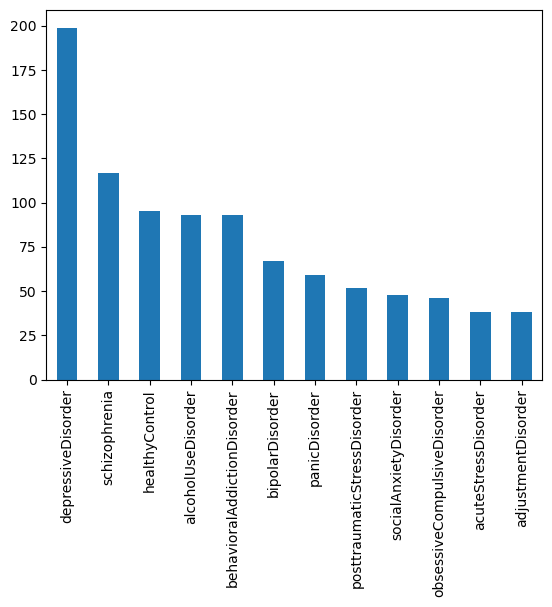

In [12]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

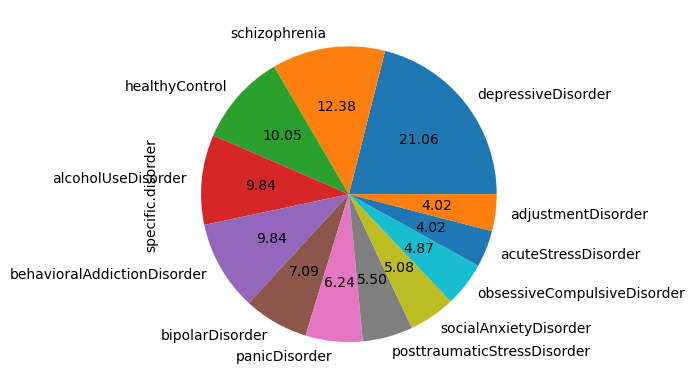

In [13]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [14]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [15]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [16]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<Axes: >

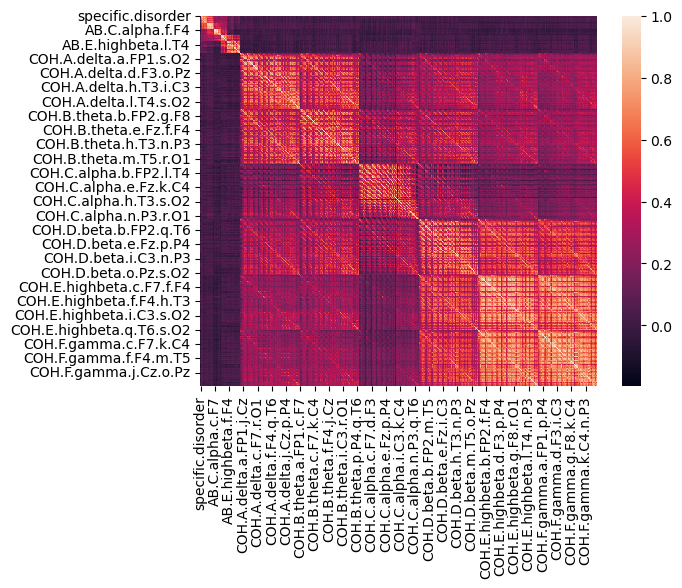

In [17]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [18]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [19]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [20]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [21]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [22]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [23]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<Axes: >

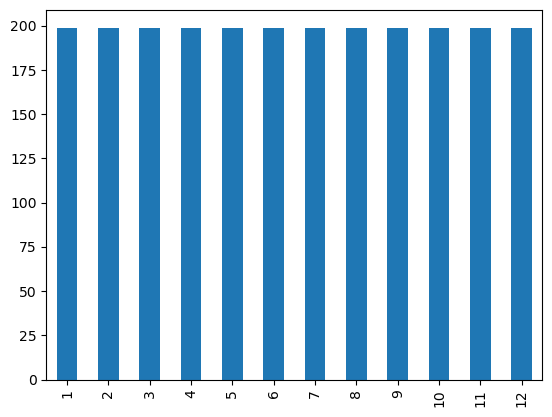

In [24]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

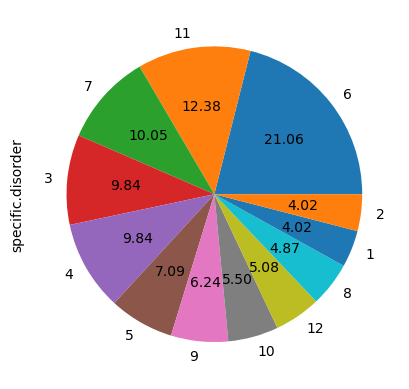

In [25]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [26]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [27]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.11,
                           depth=2)

In [28]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4677371	total: 493ms	remaining: 41m 6s
1:	learn: 2.4525602	total: 617ms	remaining: 25m 41s
2:	learn: 2.4425772	total: 753ms	remaining: 20m 53s
3:	learn: 2.4382174	total: 872ms	remaining: 18m 9s
4:	learn: 2.4240890	total: 994ms	remaining: 16m 33s
5:	learn: 2.4120205	total: 1.12s	remaining: 15m 30s
6:	learn: 2.4021345	total: 1.24s	remaining: 14m 45s
7:	learn: 2.3910283	total: 1.36s	remaining: 14m 8s
8:	learn: 2.3785581	total: 1.48s	remaining: 13m 39s
9:	learn: 2.3709890	total: 1.59s	remaining: 13m 15s
10:	learn: 2.3573515	total: 1.71s	remaining: 12m 57s
11:	learn: 2.3457330	total: 1.84s	remaining: 12m 45s
12:	learn: 2.3361458	total: 1.97s	remaining: 12m 34s
13:	learn: 2.3322859	total: 2.08s	remaining: 12m 22s
14:	learn: 2.3226412	total: 2.2s	remaining: 12m 12s
15:	learn: 2.3149210	total: 2.33s	remaining: 12m 4s
16:	learn: 2.3061624	total: 2.45s	remaining: 11m 57s
17:	learn: 2.2954689	total: 2.56s	remaining: 11m 49s
18:	learn: 2.2871460	total: 2.69s	remaining: 11m 46s
19:	lear

156:	learn: 1.5329427	total: 19.3s	remaining: 9m 53s
157:	learn: 1.5314745	total: 19.4s	remaining: 9m 53s
158:	learn: 1.5289323	total: 19.5s	remaining: 9m 53s
159:	learn: 1.5269725	total: 19.6s	remaining: 9m 53s
160:	learn: 1.5249751	total: 19.7s	remaining: 9m 52s
161:	learn: 1.5210621	total: 19.8s	remaining: 9m 52s
162:	learn: 1.5164376	total: 20s	remaining: 9m 52s
163:	learn: 1.5126496	total: 20.1s	remaining: 9m 52s
164:	learn: 1.5096604	total: 20.2s	remaining: 9m 51s
165:	learn: 1.5062386	total: 20.3s	remaining: 9m 51s
166:	learn: 1.5043101	total: 20.4s	remaining: 9m 51s
167:	learn: 1.4990946	total: 20.6s	remaining: 9m 51s
168:	learn: 1.4973545	total: 20.7s	remaining: 9m 50s
169:	learn: 1.4960019	total: 20.8s	remaining: 9m 50s
170:	learn: 1.4944457	total: 20.9s	remaining: 9m 50s
171:	learn: 1.4906906	total: 21s	remaining: 9m 50s
172:	learn: 1.4882329	total: 21.1s	remaining: 9m 49s
173:	learn: 1.4842784	total: 21.3s	remaining: 9m 49s
174:	learn: 1.4818111	total: 21.4s	remaining: 9m 4

312:	learn: 1.1798898	total: 37.7s	remaining: 9m 24s
313:	learn: 1.1786841	total: 37.8s	remaining: 9m 24s
314:	learn: 1.1752544	total: 38s	remaining: 9m 24s
315:	learn: 1.1705518	total: 38.1s	remaining: 9m 24s
316:	learn: 1.1699242	total: 38.2s	remaining: 9m 24s
317:	learn: 1.1679001	total: 38.3s	remaining: 9m 24s
318:	learn: 1.1658933	total: 38.4s	remaining: 9m 24s
319:	learn: 1.1634686	total: 38.6s	remaining: 9m 23s
320:	learn: 1.1610149	total: 38.7s	remaining: 9m 23s
321:	learn: 1.1605739	total: 38.8s	remaining: 9m 23s
322:	learn: 1.1600485	total: 38.9s	remaining: 9m 23s
323:	learn: 1.1582414	total: 39s	remaining: 9m 23s
324:	learn: 1.1567420	total: 39.1s	remaining: 9m 23s
325:	learn: 1.1556617	total: 39.3s	remaining: 9m 22s
326:	learn: 1.1537621	total: 39.4s	remaining: 9m 22s
327:	learn: 1.1534332	total: 39.5s	remaining: 9m 22s
328:	learn: 1.1518966	total: 39.6s	remaining: 9m 22s
329:	learn: 1.1495160	total: 39.7s	remaining: 9m 22s
330:	learn: 1.1469603	total: 39.9s	remaining: 9m 2

468:	learn: 0.9599157	total: 56.7s	remaining: 9m 7s
469:	learn: 0.9587769	total: 56.8s	remaining: 9m 7s
470:	learn: 0.9577076	total: 56.9s	remaining: 9m 7s
471:	learn: 0.9563803	total: 57s	remaining: 9m 7s
472:	learn: 0.9557617	total: 57.1s	remaining: 9m 6s
473:	learn: 0.9552664	total: 57.3s	remaining: 9m 6s
474:	learn: 0.9542921	total: 57.4s	remaining: 9m 6s
475:	learn: 0.9534076	total: 57.5s	remaining: 9m 6s
476:	learn: 0.9524971	total: 57.6s	remaining: 9m 6s
477:	learn: 0.9519789	total: 57.7s	remaining: 9m 6s
478:	learn: 0.9497886	total: 57.9s	remaining: 9m 6s
479:	learn: 0.9474441	total: 58s	remaining: 9m 5s
480:	learn: 0.9458474	total: 58.1s	remaining: 9m 5s
481:	learn: 0.9451669	total: 58.2s	remaining: 9m 5s
482:	learn: 0.9442238	total: 58.3s	remaining: 9m 5s
483:	learn: 0.9427577	total: 58.5s	remaining: 9m 5s
484:	learn: 0.9419516	total: 58.6s	remaining: 9m 5s
485:	learn: 0.9417890	total: 58.7s	remaining: 9m 5s
486:	learn: 0.9406806	total: 58.8s	remaining: 9m 5s
487:	learn: 0.93

624:	learn: 0.8105293	total: 1m 15s	remaining: 8m 47s
625:	learn: 0.8090437	total: 1m 15s	remaining: 8m 47s
626:	learn: 0.8068445	total: 1m 15s	remaining: 8m 47s
627:	learn: 0.8064657	total: 1m 15s	remaining: 8m 47s
628:	learn: 0.8056326	total: 1m 15s	remaining: 8m 47s
629:	learn: 0.8053618	total: 1m 15s	remaining: 8m 46s
630:	learn: 0.8041869	total: 1m 16s	remaining: 8m 46s
631:	learn: 0.8040066	total: 1m 16s	remaining: 8m 46s
632:	learn: 0.8034937	total: 1m 16s	remaining: 8m 46s
633:	learn: 0.8026099	total: 1m 16s	remaining: 8m 46s
634:	learn: 0.8017194	total: 1m 16s	remaining: 8m 46s
635:	learn: 0.8013650	total: 1m 16s	remaining: 8m 46s
636:	learn: 0.8003542	total: 1m 16s	remaining: 8m 45s
637:	learn: 0.7993832	total: 1m 16s	remaining: 8m 45s
638:	learn: 0.7985522	total: 1m 17s	remaining: 8m 45s
639:	learn: 0.7978674	total: 1m 17s	remaining: 8m 45s
640:	learn: 0.7973666	total: 1m 17s	remaining: 8m 45s
641:	learn: 0.7971399	total: 1m 17s	remaining: 8m 45s
642:	learn: 0.7966717	total:

776:	learn: 0.6940655	total: 1m 33s	remaining: 8m 27s
777:	learn: 0.6931157	total: 1m 33s	remaining: 8m 27s
778:	learn: 0.6922034	total: 1m 33s	remaining: 8m 27s
779:	learn: 0.6914968	total: 1m 33s	remaining: 8m 27s
780:	learn: 0.6906149	total: 1m 33s	remaining: 8m 27s
781:	learn: 0.6902047	total: 1m 34s	remaining: 8m 27s
782:	learn: 0.6893222	total: 1m 34s	remaining: 8m 27s
783:	learn: 0.6885580	total: 1m 34s	remaining: 8m 26s
784:	learn: 0.6875420	total: 1m 34s	remaining: 8m 26s
785:	learn: 0.6869383	total: 1m 34s	remaining: 8m 26s
786:	learn: 0.6854813	total: 1m 34s	remaining: 8m 26s
787:	learn: 0.6843009	total: 1m 34s	remaining: 8m 26s
788:	learn: 0.6832998	total: 1m 34s	remaining: 8m 26s
789:	learn: 0.6817061	total: 1m 35s	remaining: 8m 26s
790:	learn: 0.6813561	total: 1m 35s	remaining: 8m 26s
791:	learn: 0.6799108	total: 1m 35s	remaining: 8m 26s
792:	learn: 0.6788974	total: 1m 35s	remaining: 8m 26s
793:	learn: 0.6774754	total: 1m 35s	remaining: 8m 25s
794:	learn: 0.6773144	total:

928:	learn: 0.5984645	total: 1m 51s	remaining: 8m 10s
929:	learn: 0.5981227	total: 1m 51s	remaining: 8m 10s
930:	learn: 0.5979501	total: 1m 52s	remaining: 8m 10s
931:	learn: 0.5975448	total: 1m 52s	remaining: 8m 9s
932:	learn: 0.5969046	total: 1m 52s	remaining: 8m 9s
933:	learn: 0.5962977	total: 1m 52s	remaining: 8m 9s
934:	learn: 0.5949997	total: 1m 52s	remaining: 8m 9s
935:	learn: 0.5948455	total: 1m 52s	remaining: 8m 9s
936:	learn: 0.5947586	total: 1m 52s	remaining: 8m 9s
937:	learn: 0.5944152	total: 1m 52s	remaining: 8m 9s
938:	learn: 0.5939357	total: 1m 53s	remaining: 8m 9s
939:	learn: 0.5933399	total: 1m 53s	remaining: 8m 8s
940:	learn: 0.5930628	total: 1m 53s	remaining: 8m 8s
941:	learn: 0.5928175	total: 1m 53s	remaining: 8m 8s
942:	learn: 0.5923893	total: 1m 53s	remaining: 8m 8s
943:	learn: 0.5915166	total: 1m 53s	remaining: 8m 8s
944:	learn: 0.5908670	total: 1m 53s	remaining: 8m 8s
945:	learn: 0.5902814	total: 1m 53s	remaining: 8m 8s
946:	learn: 0.5895358	total: 1m 54s	remaini

1084:	learn: 0.5219140	total: 2m 10s	remaining: 7m 51s
1085:	learn: 0.5212163	total: 2m 10s	remaining: 7m 51s
1086:	learn: 0.5202844	total: 2m 10s	remaining: 7m 51s
1087:	learn: 0.5200998	total: 2m 11s	remaining: 7m 51s
1088:	learn: 0.5196921	total: 2m 11s	remaining: 7m 51s
1089:	learn: 0.5193051	total: 2m 11s	remaining: 7m 51s
1090:	learn: 0.5188320	total: 2m 11s	remaining: 7m 50s
1091:	learn: 0.5178643	total: 2m 11s	remaining: 7m 50s
1092:	learn: 0.5172576	total: 2m 11s	remaining: 7m 50s
1093:	learn: 0.5168159	total: 2m 11s	remaining: 7m 50s
1094:	learn: 0.5161567	total: 2m 11s	remaining: 7m 50s
1095:	learn: 0.5157048	total: 2m 12s	remaining: 7m 50s
1096:	learn: 0.5150698	total: 2m 12s	remaining: 7m 50s
1097:	learn: 0.5146476	total: 2m 12s	remaining: 7m 49s
1098:	learn: 0.5140971	total: 2m 12s	remaining: 7m 49s
1099:	learn: 0.5136185	total: 2m 12s	remaining: 7m 49s
1100:	learn: 0.5130584	total: 2m 12s	remaining: 7m 49s
1101:	learn: 0.5127136	total: 2m 12s	remaining: 7m 49s
1102:	lear

1234:	learn: 0.4582416	total: 2m 31s	remaining: 7m 43s
1235:	learn: 0.4581318	total: 2m 32s	remaining: 7m 42s
1236:	learn: 0.4572922	total: 2m 32s	remaining: 7m 42s
1237:	learn: 0.4572061	total: 2m 32s	remaining: 7m 42s
1238:	learn: 0.4568920	total: 2m 32s	remaining: 7m 42s
1239:	learn: 0.4561655	total: 2m 32s	remaining: 7m 42s
1240:	learn: 0.4558048	total: 2m 32s	remaining: 7m 42s
1241:	learn: 0.4554503	total: 2m 32s	remaining: 7m 42s
1242:	learn: 0.4551425	total: 2m 32s	remaining: 7m 41s
1243:	learn: 0.4550173	total: 2m 32s	remaining: 7m 41s
1244:	learn: 0.4544577	total: 2m 33s	remaining: 7m 41s
1245:	learn: 0.4539514	total: 2m 33s	remaining: 7m 41s
1246:	learn: 0.4536488	total: 2m 33s	remaining: 7m 41s
1247:	learn: 0.4532479	total: 2m 33s	remaining: 7m 41s
1248:	learn: 0.4530072	total: 2m 33s	remaining: 7m 41s
1249:	learn: 0.4525746	total: 2m 33s	remaining: 7m 40s
1250:	learn: 0.4521473	total: 2m 33s	remaining: 7m 40s
1251:	learn: 0.4515517	total: 2m 33s	remaining: 7m 40s
1252:	lear

1384:	learn: 0.4089401	total: 2m 49s	remaining: 7m 23s
1385:	learn: 0.4088811	total: 2m 49s	remaining: 7m 23s
1386:	learn: 0.4080210	total: 2m 50s	remaining: 7m 22s
1387:	learn: 0.4076337	total: 2m 50s	remaining: 7m 22s
1388:	learn: 0.4072146	total: 2m 50s	remaining: 7m 22s
1389:	learn: 0.4068643	total: 2m 50s	remaining: 7m 22s
1390:	learn: 0.4068287	total: 2m 50s	remaining: 7m 22s
1391:	learn: 0.4064494	total: 2m 50s	remaining: 7m 22s
1392:	learn: 0.4061231	total: 2m 50s	remaining: 7m 22s
1393:	learn: 0.4056603	total: 2m 50s	remaining: 7m 22s
1394:	learn: 0.4053749	total: 2m 51s	remaining: 7m 22s
1395:	learn: 0.4050401	total: 2m 51s	remaining: 7m 22s
1396:	learn: 0.4044688	total: 2m 51s	remaining: 7m 21s
1397:	learn: 0.4040450	total: 2m 51s	remaining: 7m 21s
1398:	learn: 0.4036130	total: 2m 51s	remaining: 7m 21s
1399:	learn: 0.4034843	total: 2m 51s	remaining: 7m 21s
1400:	learn: 0.4033636	total: 2m 51s	remaining: 7m 21s
1401:	learn: 0.4030395	total: 2m 51s	remaining: 7m 21s
1402:	lear

1536:	learn: 0.3637916	total: 3m 12s	remaining: 7m 12s
1537:	learn: 0.3637558	total: 3m 12s	remaining: 7m 12s
1538:	learn: 0.3635272	total: 3m 12s	remaining: 7m 12s
1539:	learn: 0.3634418	total: 3m 12s	remaining: 7m 12s
1540:	learn: 0.3631143	total: 3m 12s	remaining: 7m 12s
1541:	learn: 0.3627282	total: 3m 12s	remaining: 7m 11s
1542:	learn: 0.3625197	total: 3m 12s	remaining: 7m 11s
1543:	learn: 0.3624593	total: 3m 12s	remaining: 7m 11s
1544:	learn: 0.3622024	total: 3m 12s	remaining: 7m 11s
1545:	learn: 0.3619089	total: 3m 13s	remaining: 7m 11s
1546:	learn: 0.3617761	total: 3m 13s	remaining: 7m 11s
1547:	learn: 0.3617137	total: 3m 13s	remaining: 7m 11s
1548:	learn: 0.3614062	total: 3m 13s	remaining: 7m 11s
1549:	learn: 0.3611091	total: 3m 13s	remaining: 7m 10s
1550:	learn: 0.3609751	total: 3m 13s	remaining: 7m 10s
1551:	learn: 0.3608580	total: 3m 13s	remaining: 7m 10s
1552:	learn: 0.3605290	total: 3m 13s	remaining: 7m 10s
1553:	learn: 0.3604590	total: 3m 14s	remaining: 7m 10s
1554:	lear

1688:	learn: 0.3263463	total: 3m 29s	remaining: 6m 51s
1689:	learn: 0.3260665	total: 3m 29s	remaining: 6m 51s
1690:	learn: 0.3258269	total: 3m 30s	remaining: 6m 51s
1691:	learn: 0.3255877	total: 3m 30s	remaining: 6m 51s
1692:	learn: 0.3251845	total: 3m 30s	remaining: 6m 50s
1693:	learn: 0.3248347	total: 3m 30s	remaining: 6m 50s
1694:	learn: 0.3245511	total: 3m 30s	remaining: 6m 50s
1695:	learn: 0.3243295	total: 3m 30s	remaining: 6m 50s
1696:	learn: 0.3242047	total: 3m 30s	remaining: 6m 50s
1697:	learn: 0.3239239	total: 3m 30s	remaining: 6m 50s
1698:	learn: 0.3236361	total: 3m 31s	remaining: 6m 50s
1699:	learn: 0.3235795	total: 3m 31s	remaining: 6m 49s
1700:	learn: 0.3233258	total: 3m 31s	remaining: 6m 49s
1701:	learn: 0.3229960	total: 3m 31s	remaining: 6m 49s
1702:	learn: 0.3227724	total: 3m 31s	remaining: 6m 49s
1703:	learn: 0.3224734	total: 3m 31s	remaining: 6m 49s
1704:	learn: 0.3221021	total: 3m 31s	remaining: 6m 49s
1705:	learn: 0.3220533	total: 3m 31s	remaining: 6m 49s
1706:	lear

1837:	learn: 0.2967564	total: 3m 51s	remaining: 6m 37s
1838:	learn: 0.2964160	total: 3m 51s	remaining: 6m 37s
1839:	learn: 0.2961822	total: 3m 51s	remaining: 6m 37s
1840:	learn: 0.2960170	total: 3m 51s	remaining: 6m 37s
1841:	learn: 0.2957932	total: 3m 51s	remaining: 6m 37s
1842:	learn: 0.2955506	total: 3m 51s	remaining: 6m 36s
1843:	learn: 0.2953816	total: 3m 51s	remaining: 6m 36s
1844:	learn: 0.2949961	total: 3m 51s	remaining: 6m 36s
1845:	learn: 0.2949255	total: 3m 52s	remaining: 6m 36s
1846:	learn: 0.2949040	total: 3m 52s	remaining: 6m 36s
1847:	learn: 0.2947176	total: 3m 52s	remaining: 6m 36s
1848:	learn: 0.2946842	total: 3m 52s	remaining: 6m 36s
1849:	learn: 0.2945148	total: 3m 52s	remaining: 6m 36s
1850:	learn: 0.2943032	total: 3m 52s	remaining: 6m 35s
1851:	learn: 0.2940488	total: 3m 52s	remaining: 6m 35s
1852:	learn: 0.2939946	total: 3m 52s	remaining: 6m 35s
1853:	learn: 0.2937953	total: 3m 53s	remaining: 6m 35s
1854:	learn: 0.2934429	total: 3m 53s	remaining: 6m 35s
1855:	lear

1989:	learn: 0.2681105	total: 4m 8s	remaining: 6m 16s
1990:	learn: 0.2679467	total: 4m 9s	remaining: 6m 16s
1991:	learn: 0.2677842	total: 4m 9s	remaining: 6m 16s
1992:	learn: 0.2675062	total: 4m 9s	remaining: 6m 16s
1993:	learn: 0.2674840	total: 4m 9s	remaining: 6m 16s
1994:	learn: 0.2673082	total: 4m 9s	remaining: 6m 15s
1995:	learn: 0.2671569	total: 4m 9s	remaining: 6m 15s
1996:	learn: 0.2670799	total: 4m 9s	remaining: 6m 15s
1997:	learn: 0.2668607	total: 4m 9s	remaining: 6m 15s
1998:	learn: 0.2666003	total: 4m 10s	remaining: 6m 15s
1999:	learn: 0.2663258	total: 4m 10s	remaining: 6m 15s
2000:	learn: 0.2662053	total: 4m 10s	remaining: 6m 15s
2001:	learn: 0.2660783	total: 4m 10s	remaining: 6m 14s
2002:	learn: 0.2660520	total: 4m 10s	remaining: 6m 14s
2003:	learn: 0.2658519	total: 4m 10s	remaining: 6m 14s
2004:	learn: 0.2657129	total: 4m 10s	remaining: 6m 14s
2005:	learn: 0.2654299	total: 4m 10s	remaining: 6m 14s
2006:	learn: 0.2652246	total: 4m 10s	remaining: 6m 14s
2007:	learn: 0.2650

2140:	learn: 0.2415044	total: 4m 30s	remaining: 6m 1s
2141:	learn: 0.2413937	total: 4m 30s	remaining: 6m
2142:	learn: 0.2413395	total: 4m 30s	remaining: 6m
2143:	learn: 0.2411192	total: 4m 30s	remaining: 6m
2144:	learn: 0.2410200	total: 4m 30s	remaining: 6m
2145:	learn: 0.2409654	total: 4m 30s	remaining: 6m
2146:	learn: 0.2408839	total: 4m 31s	remaining: 6m
2147:	learn: 0.2406441	total: 4m 31s	remaining: 6m
2148:	learn: 0.2404193	total: 4m 31s	remaining: 5m 59s
2149:	learn: 0.2403097	total: 4m 31s	remaining: 5m 59s
2150:	learn: 0.2401476	total: 4m 31s	remaining: 5m 59s
2151:	learn: 0.2399559	total: 4m 31s	remaining: 5m 59s
2152:	learn: 0.2398793	total: 4m 31s	remaining: 5m 59s
2153:	learn: 0.2396951	total: 4m 31s	remaining: 5m 59s
2154:	learn: 0.2395379	total: 4m 32s	remaining: 5m 59s
2155:	learn: 0.2393694	total: 4m 32s	remaining: 5m 58s
2156:	learn: 0.2393271	total: 4m 32s	remaining: 5m 58s
2157:	learn: 0.2391551	total: 4m 32s	remaining: 5m 58s
2158:	learn: 0.2389142	total: 4m 32s	re

2290:	learn: 0.2196799	total: 4m 49s	remaining: 5m 42s
2291:	learn: 0.2194836	total: 4m 49s	remaining: 5m 42s
2292:	learn: 0.2193659	total: 4m 49s	remaining: 5m 42s
2293:	learn: 0.2192358	total: 4m 50s	remaining: 5m 42s
2294:	learn: 0.2191043	total: 4m 50s	remaining: 5m 42s
2295:	learn: 0.2189715	total: 4m 50s	remaining: 5m 42s
2296:	learn: 0.2189300	total: 4m 50s	remaining: 5m 42s
2297:	learn: 0.2189136	total: 4m 50s	remaining: 5m 42s
2298:	learn: 0.2188930	total: 4m 51s	remaining: 5m 42s
2299:	learn: 0.2188453	total: 4m 51s	remaining: 5m 42s
2300:	learn: 0.2186877	total: 4m 51s	remaining: 5m 42s
2301:	learn: 0.2185192	total: 4m 51s	remaining: 5m 42s
2302:	learn: 0.2184321	total: 4m 52s	remaining: 5m 42s
2303:	learn: 0.2183038	total: 4m 52s	remaining: 5m 42s
2304:	learn: 0.2181194	total: 4m 52s	remaining: 5m 42s
2305:	learn: 0.2180449	total: 4m 52s	remaining: 5m 42s
2306:	learn: 0.2178856	total: 4m 53s	remaining: 5m 42s
2307:	learn: 0.2176507	total: 4m 53s	remaining: 5m 42s
2308:	lear

2442:	learn: 0.2004561	total: 5m 9s	remaining: 5m 24s
2443:	learn: 0.2002620	total: 5m 9s	remaining: 5m 23s
2444:	learn: 0.2001984	total: 5m 9s	remaining: 5m 23s
2445:	learn: 0.2001201	total: 5m 10s	remaining: 5m 23s
2446:	learn: 0.1999594	total: 5m 10s	remaining: 5m 23s
2447:	learn: 0.1997842	total: 5m 10s	remaining: 5m 23s
2448:	learn: 0.1996280	total: 5m 10s	remaining: 5m 23s
2449:	learn: 0.1994849	total: 5m 10s	remaining: 5m 23s
2450:	learn: 0.1993670	total: 5m 10s	remaining: 5m 23s
2451:	learn: 0.1991689	total: 5m 10s	remaining: 5m 22s
2452:	learn: 0.1990080	total: 5m 10s	remaining: 5m 22s
2453:	learn: 0.1988440	total: 5m 10s	remaining: 5m 22s
2454:	learn: 0.1986437	total: 5m 11s	remaining: 5m 22s
2455:	learn: 0.1985921	total: 5m 11s	remaining: 5m 22s
2456:	learn: 0.1984553	total: 5m 11s	remaining: 5m 22s
2457:	learn: 0.1984352	total: 5m 11s	remaining: 5m 22s
2458:	learn: 0.1983006	total: 5m 11s	remaining: 5m 21s
2459:	learn: 0.1981319	total: 5m 11s	remaining: 5m 21s
2460:	learn: 

2593:	learn: 0.1830821	total: 5m 31s	remaining: 5m 7s
2594:	learn: 0.1829247	total: 5m 31s	remaining: 5m 7s
2595:	learn: 0.1828166	total: 5m 31s	remaining: 5m 7s
2596:	learn: 0.1827561	total: 5m 31s	remaining: 5m 7s
2597:	learn: 0.1826460	total: 5m 31s	remaining: 5m 6s
2598:	learn: 0.1824292	total: 5m 32s	remaining: 5m 6s
2599:	learn: 0.1823002	total: 5m 32s	remaining: 5m 6s
2600:	learn: 0.1821620	total: 5m 32s	remaining: 5m 6s
2601:	learn: 0.1820550	total: 5m 32s	remaining: 5m 6s
2602:	learn: 0.1819304	total: 5m 32s	remaining: 5m 6s
2603:	learn: 0.1819005	total: 5m 32s	remaining: 5m 6s
2604:	learn: 0.1817713	total: 5m 32s	remaining: 5m 5s
2605:	learn: 0.1816465	total: 5m 32s	remaining: 5m 5s
2606:	learn: 0.1814541	total: 5m 33s	remaining: 5m 5s
2607:	learn: 0.1813047	total: 5m 33s	remaining: 5m 5s
2608:	learn: 0.1810820	total: 5m 33s	remaining: 5m 5s
2609:	learn: 0.1809626	total: 5m 33s	remaining: 5m 5s
2610:	learn: 0.1808630	total: 5m 33s	remaining: 5m 5s
2611:	learn: 0.1807435	total

2745:	learn: 0.1674756	total: 5m 49s	remaining: 4m 47s
2746:	learn: 0.1674007	total: 5m 50s	remaining: 4m 47s
2747:	learn: 0.1673048	total: 5m 50s	remaining: 4m 46s
2748:	learn: 0.1672309	total: 5m 50s	remaining: 4m 46s
2749:	learn: 0.1672119	total: 5m 50s	remaining: 4m 46s
2750:	learn: 0.1671142	total: 5m 50s	remaining: 4m 46s
2751:	learn: 0.1669548	total: 5m 50s	remaining: 4m 46s
2752:	learn: 0.1669285	total: 5m 50s	remaining: 4m 46s
2753:	learn: 0.1669143	total: 5m 50s	remaining: 4m 46s
2754:	learn: 0.1667739	total: 5m 51s	remaining: 4m 46s
2755:	learn: 0.1666954	total: 5m 51s	remaining: 4m 45s
2756:	learn: 0.1665387	total: 5m 51s	remaining: 4m 45s
2757:	learn: 0.1665267	total: 5m 51s	remaining: 4m 45s
2758:	learn: 0.1664711	total: 5m 51s	remaining: 4m 45s
2759:	learn: 0.1663538	total: 5m 51s	remaining: 4m 45s
2760:	learn: 0.1663188	total: 5m 51s	remaining: 4m 45s
2761:	learn: 0.1662137	total: 5m 51s	remaining: 4m 45s
2762:	learn: 0.1661288	total: 5m 52s	remaining: 4m 45s
2763:	lear

2896:	learn: 0.1548850	total: 6m 12s	remaining: 4m 30s
2897:	learn: 0.1548782	total: 6m 12s	remaining: 4m 30s
2898:	learn: 0.1547176	total: 6m 12s	remaining: 4m 29s
2899:	learn: 0.1545992	total: 6m 12s	remaining: 4m 29s
2900:	learn: 0.1545033	total: 6m 12s	remaining: 4m 29s
2901:	learn: 0.1544194	total: 6m 12s	remaining: 4m 29s
2902:	learn: 0.1543232	total: 6m 12s	remaining: 4m 29s
2903:	learn: 0.1543025	total: 6m 13s	remaining: 4m 29s
2904:	learn: 0.1541929	total: 6m 13s	remaining: 4m 29s
2905:	learn: 0.1541774	total: 6m 13s	remaining: 4m 28s
2906:	learn: 0.1540528	total: 6m 13s	remaining: 4m 28s
2907:	learn: 0.1539807	total: 6m 13s	remaining: 4m 28s
2908:	learn: 0.1538925	total: 6m 13s	remaining: 4m 28s
2909:	learn: 0.1537863	total: 6m 13s	remaining: 4m 28s
2910:	learn: 0.1537749	total: 6m 13s	remaining: 4m 28s
2911:	learn: 0.1537234	total: 6m 14s	remaining: 4m 28s
2912:	learn: 0.1536266	total: 6m 14s	remaining: 4m 28s
2913:	learn: 0.1534956	total: 6m 14s	remaining: 4m 27s
2914:	lear

3046:	learn: 0.1426641	total: 6m 34s	remaining: 4m 13s
3047:	learn: 0.1425815	total: 6m 34s	remaining: 4m 12s
3048:	learn: 0.1425142	total: 6m 34s	remaining: 4m 12s
3049:	learn: 0.1425060	total: 6m 35s	remaining: 4m 12s
3050:	learn: 0.1424881	total: 6m 35s	remaining: 4m 12s
3051:	learn: 0.1424791	total: 6m 35s	remaining: 4m 12s
3052:	learn: 0.1424049	total: 6m 35s	remaining: 4m 12s
3053:	learn: 0.1423869	total: 6m 35s	remaining: 4m 12s
3054:	learn: 0.1423699	total: 6m 35s	remaining: 4m 11s
3055:	learn: 0.1422752	total: 6m 35s	remaining: 4m 11s
3056:	learn: 0.1422272	total: 6m 35s	remaining: 4m 11s
3057:	learn: 0.1421854	total: 6m 36s	remaining: 4m 11s
3058:	learn: 0.1421030	total: 6m 36s	remaining: 4m 11s
3059:	learn: 0.1420477	total: 6m 36s	remaining: 4m 11s
3060:	learn: 0.1420253	total: 6m 36s	remaining: 4m 11s
3061:	learn: 0.1419285	total: 6m 36s	remaining: 4m 10s
3062:	learn: 0.1418468	total: 6m 36s	remaining: 4m 10s
3063:	learn: 0.1416723	total: 6m 36s	remaining: 4m 10s
3064:	lear

3198:	learn: 0.1322197	total: 6m 52s	remaining: 3m 52s
3199:	learn: 0.1321656	total: 6m 52s	remaining: 3m 52s
3200:	learn: 0.1321184	total: 6m 52s	remaining: 3m 52s
3201:	learn: 0.1320157	total: 6m 53s	remaining: 3m 51s
3202:	learn: 0.1319483	total: 6m 53s	remaining: 3m 51s
3203:	learn: 0.1319015	total: 6m 53s	remaining: 3m 51s
3204:	learn: 0.1318469	total: 6m 53s	remaining: 3m 51s
3205:	learn: 0.1318266	total: 6m 53s	remaining: 3m 51s
3206:	learn: 0.1317420	total: 6m 53s	remaining: 3m 51s
3207:	learn: 0.1316738	total: 6m 53s	remaining: 3m 51s
3208:	learn: 0.1316258	total: 6m 53s	remaining: 3m 50s
3209:	learn: 0.1316035	total: 6m 54s	remaining: 3m 50s
3210:	learn: 0.1314858	total: 6m 54s	remaining: 3m 50s
3211:	learn: 0.1313965	total: 6m 54s	remaining: 3m 50s
3212:	learn: 0.1312690	total: 6m 54s	remaining: 3m 50s
3213:	learn: 0.1311937	total: 6m 54s	remaining: 3m 50s
3214:	learn: 0.1311164	total: 6m 54s	remaining: 3m 50s
3215:	learn: 0.1310150	total: 6m 54s	remaining: 3m 50s
3216:	lear

3350:	learn: 0.1224709	total: 7m 14s	remaining: 3m 33s
3351:	learn: 0.1223512	total: 7m 14s	remaining: 3m 33s
3352:	learn: 0.1222756	total: 7m 14s	remaining: 3m 33s
3353:	learn: 0.1222612	total: 7m 15s	remaining: 3m 33s
3354:	learn: 0.1222340	total: 7m 15s	remaining: 3m 33s
3355:	learn: 0.1222245	total: 7m 15s	remaining: 3m 33s
3356:	learn: 0.1221713	total: 7m 15s	remaining: 3m 33s
3357:	learn: 0.1220431	total: 7m 15s	remaining: 3m 32s
3358:	learn: 0.1219786	total: 7m 15s	remaining: 3m 32s
3359:	learn: 0.1219227	total: 7m 15s	remaining: 3m 32s
3360:	learn: 0.1219183	total: 7m 15s	remaining: 3m 32s
3361:	learn: 0.1218147	total: 7m 16s	remaining: 3m 32s
3362:	learn: 0.1218076	total: 7m 16s	remaining: 3m 32s
3363:	learn: 0.1217731	total: 7m 16s	remaining: 3m 32s
3364:	learn: 0.1217635	total: 7m 16s	remaining: 3m 32s
3365:	learn: 0.1217427	total: 7m 16s	remaining: 3m 31s
3366:	learn: 0.1216210	total: 7m 16s	remaining: 3m 31s
3367:	learn: 0.1215279	total: 7m 16s	remaining: 3m 31s
3368:	lear

3499:	learn: 0.1140600	total: 7m 36s	remaining: 3m 15s
3500:	learn: 0.1139831	total: 7m 36s	remaining: 3m 15s
3501:	learn: 0.1139719	total: 7m 36s	remaining: 3m 15s
3502:	learn: 0.1138916	total: 7m 36s	remaining: 3m 15s
3503:	learn: 0.1138857	total: 7m 36s	remaining: 3m 15s
3504:	learn: 0.1138444	total: 7m 37s	remaining: 3m 14s
3505:	learn: 0.1137328	total: 7m 37s	remaining: 3m 14s
3506:	learn: 0.1136572	total: 7m 37s	remaining: 3m 14s
3507:	learn: 0.1136525	total: 7m 37s	remaining: 3m 14s
3508:	learn: 0.1135287	total: 7m 37s	remaining: 3m 14s
3509:	learn: 0.1134552	total: 7m 37s	remaining: 3m 14s
3510:	learn: 0.1133904	total: 7m 37s	remaining: 3m 14s
3511:	learn: 0.1133616	total: 7m 37s	remaining: 3m 14s
3512:	learn: 0.1133246	total: 7m 38s	remaining: 3m 13s
3513:	learn: 0.1132449	total: 7m 38s	remaining: 3m 13s
3514:	learn: 0.1131819	total: 7m 38s	remaining: 3m 13s
3515:	learn: 0.1131031	total: 7m 38s	remaining: 3m 13s
3516:	learn: 0.1130278	total: 7m 38s	remaining: 3m 13s
3517:	lear

3651:	learn: 0.1069722	total: 7m 54s	remaining: 2m 55s
3652:	learn: 0.1069089	total: 7m 54s	remaining: 2m 55s
3653:	learn: 0.1068407	total: 7m 54s	remaining: 2m 54s
3654:	learn: 0.1067761	total: 7m 55s	remaining: 2m 54s
3655:	learn: 0.1067243	total: 7m 55s	remaining: 2m 54s
3656:	learn: 0.1067135	total: 7m 55s	remaining: 2m 54s
3657:	learn: 0.1067017	total: 7m 55s	remaining: 2m 54s
3658:	learn: 0.1066728	total: 7m 55s	remaining: 2m 54s
3659:	learn: 0.1066539	total: 7m 55s	remaining: 2m 54s
3660:	learn: 0.1065606	total: 7m 55s	remaining: 2m 53s
3661:	learn: 0.1065095	total: 7m 55s	remaining: 2m 53s
3662:	learn: 0.1065036	total: 7m 55s	remaining: 2m 53s
3663:	learn: 0.1064906	total: 7m 56s	remaining: 2m 53s
3664:	learn: 0.1064851	total: 7m 56s	remaining: 2m 53s
3665:	learn: 0.1064419	total: 7m 56s	remaining: 2m 53s
3666:	learn: 0.1063490	total: 7m 56s	remaining: 2m 53s
3667:	learn: 0.1062834	total: 7m 56s	remaining: 2m 53s
3668:	learn: 0.1062705	total: 7m 56s	remaining: 2m 52s
3669:	lear

3803:	learn: 0.0996343	total: 8m 17s	remaining: 2m 36s
3804:	learn: 0.0996285	total: 8m 17s	remaining: 2m 36s
3805:	learn: 0.0995699	total: 8m 17s	remaining: 2m 36s
3806:	learn: 0.0995248	total: 8m 17s	remaining: 2m 35s
3807:	learn: 0.0995208	total: 8m 17s	remaining: 2m 35s
3808:	learn: 0.0994285	total: 8m 17s	remaining: 2m 35s
3809:	learn: 0.0994105	total: 8m 18s	remaining: 2m 35s
3810:	learn: 0.0993591	total: 8m 18s	remaining: 2m 35s
3811:	learn: 0.0993073	total: 8m 18s	remaining: 2m 35s
3812:	learn: 0.0992586	total: 8m 18s	remaining: 2m 35s
3813:	learn: 0.0991981	total: 8m 18s	remaining: 2m 35s
3814:	learn: 0.0991429	total: 8m 18s	remaining: 2m 34s
3815:	learn: 0.0991397	total: 8m 18s	remaining: 2m 34s
3816:	learn: 0.0990982	total: 8m 18s	remaining: 2m 34s
3817:	learn: 0.0990311	total: 8m 19s	remaining: 2m 34s
3818:	learn: 0.0989722	total: 8m 19s	remaining: 2m 34s
3819:	learn: 0.0989545	total: 8m 19s	remaining: 2m 34s
3820:	learn: 0.0989400	total: 8m 19s	remaining: 2m 34s
3821:	lear

3952:	learn: 0.0933652	total: 8m 38s	remaining: 2m 17s
3953:	learn: 0.0933152	total: 8m 38s	remaining: 2m 17s
3954:	learn: 0.0932577	total: 8m 39s	remaining: 2m 17s
3955:	learn: 0.0932495	total: 8m 39s	remaining: 2m 17s
3956:	learn: 0.0931889	total: 8m 39s	remaining: 2m 16s
3957:	learn: 0.0931422	total: 8m 39s	remaining: 2m 16s
3958:	learn: 0.0930832	total: 8m 39s	remaining: 2m 16s
3959:	learn: 0.0930437	total: 8m 39s	remaining: 2m 16s
3960:	learn: 0.0929923	total: 8m 39s	remaining: 2m 16s
3961:	learn: 0.0929873	total: 8m 39s	remaining: 2m 16s
3962:	learn: 0.0929794	total: 8m 40s	remaining: 2m 16s
3963:	learn: 0.0929726	total: 8m 40s	remaining: 2m 15s
3964:	learn: 0.0929445	total: 8m 40s	remaining: 2m 15s
3965:	learn: 0.0928968	total: 8m 40s	remaining: 2m 15s
3966:	learn: 0.0928575	total: 8m 40s	remaining: 2m 15s
3967:	learn: 0.0928400	total: 8m 40s	remaining: 2m 15s
3968:	learn: 0.0927938	total: 8m 40s	remaining: 2m 15s
3969:	learn: 0.0927433	total: 8m 40s	remaining: 2m 15s
3970:	lear

4104:	learn: 0.0876158	total: 8m 56s	remaining: 1m 57s
4105:	learn: 0.0876023	total: 8m 56s	remaining: 1m 56s
4106:	learn: 0.0875536	total: 8m 57s	remaining: 1m 56s
4107:	learn: 0.0875106	total: 8m 57s	remaining: 1m 56s
4108:	learn: 0.0874816	total: 8m 57s	remaining: 1m 56s
4109:	learn: 0.0874437	total: 8m 57s	remaining: 1m 56s
4110:	learn: 0.0873876	total: 8m 57s	remaining: 1m 56s
4111:	learn: 0.0873504	total: 8m 57s	remaining: 1m 56s
4112:	learn: 0.0873003	total: 8m 57s	remaining: 1m 55s
4113:	learn: 0.0872316	total: 8m 57s	remaining: 1m 55s
4114:	learn: 0.0871620	total: 8m 58s	remaining: 1m 55s
4115:	learn: 0.0870632	total: 8m 58s	remaining: 1m 55s
4116:	learn: 0.0870549	total: 8m 58s	remaining: 1m 55s
4117:	learn: 0.0870063	total: 8m 58s	remaining: 1m 55s
4118:	learn: 0.0869574	total: 8m 58s	remaining: 1m 55s
4119:	learn: 0.0869537	total: 8m 58s	remaining: 1m 55s
4120:	learn: 0.0869175	total: 8m 58s	remaining: 1m 54s
4121:	learn: 0.0868767	total: 8m 58s	remaining: 1m 54s
4122:	lear

4256:	learn: 0.0819888	total: 9m 18s	remaining: 1m 37s
4257:	learn: 0.0819712	total: 9m 18s	remaining: 1m 37s
4258:	learn: 0.0819052	total: 9m 18s	remaining: 1m 37s
4259:	learn: 0.0818972	total: 9m 18s	remaining: 1m 37s
4260:	learn: 0.0818926	total: 9m 18s	remaining: 1m 36s
4261:	learn: 0.0818526	total: 9m 19s	remaining: 1m 36s
4262:	learn: 0.0818446	total: 9m 19s	remaining: 1m 36s
4263:	learn: 0.0817999	total: 9m 19s	remaining: 1m 36s
4264:	learn: 0.0817967	total: 9m 19s	remaining: 1m 36s
4265:	learn: 0.0817594	total: 9m 19s	remaining: 1m 36s
4266:	learn: 0.0817534	total: 9m 19s	remaining: 1m 36s
4267:	learn: 0.0817455	total: 9m 19s	remaining: 1m 36s
4268:	learn: 0.0817015	total: 9m 19s	remaining: 1m 35s
4269:	learn: 0.0816530	total: 9m 19s	remaining: 1m 35s
4270:	learn: 0.0816175	total: 9m 20s	remaining: 1m 35s
4271:	learn: 0.0815821	total: 9m 20s	remaining: 1m 35s
4272:	learn: 0.0815222	total: 9m 20s	remaining: 1m 35s
4273:	learn: 0.0814848	total: 9m 20s	remaining: 1m 35s
4274:	lear

4405:	learn: 0.0770964	total: 9m 38s	remaining: 1m 17s
4406:	learn: 0.0770869	total: 9m 38s	remaining: 1m 17s
4407:	learn: 0.0770393	total: 9m 38s	remaining: 1m 17s
4408:	learn: 0.0769942	total: 9m 38s	remaining: 1m 17s
4409:	learn: 0.0769827	total: 9m 39s	remaining: 1m 17s
4410:	learn: 0.0769503	total: 9m 39s	remaining: 1m 17s
4411:	learn: 0.0768963	total: 9m 39s	remaining: 1m 17s
4412:	learn: 0.0768224	total: 9m 39s	remaining: 1m 17s
4413:	learn: 0.0768201	total: 9m 39s	remaining: 1m 16s
4414:	learn: 0.0767810	total: 9m 40s	remaining: 1m 16s
4415:	learn: 0.0767584	total: 9m 40s	remaining: 1m 16s
4416:	learn: 0.0767029	total: 9m 40s	remaining: 1m 16s
4417:	learn: 0.0766683	total: 9m 40s	remaining: 1m 16s
4418:	learn: 0.0766450	total: 9m 41s	remaining: 1m 16s
4419:	learn: 0.0765992	total: 9m 41s	remaining: 1m 16s
4420:	learn: 0.0765506	total: 9m 41s	remaining: 1m 16s
4421:	learn: 0.0765187	total: 9m 41s	remaining: 1m 16s
4422:	learn: 0.0765122	total: 9m 41s	remaining: 1m 15s
4423:	lear

4557:	learn: 0.0725249	total: 9m 57s	remaining: 57.9s
4558:	learn: 0.0724749	total: 9m 57s	remaining: 57.8s
4559:	learn: 0.0724731	total: 9m 57s	remaining: 57.7s
4560:	learn: 0.0724357	total: 9m 57s	remaining: 57.5s
4561:	learn: 0.0724312	total: 9m 57s	remaining: 57.4s
4562:	learn: 0.0724290	total: 9m 58s	remaining: 57.3s
4563:	learn: 0.0724056	total: 9m 58s	remaining: 57.1s
4564:	learn: 0.0723560	total: 9m 58s	remaining: 57s
4565:	learn: 0.0723125	total: 9m 58s	remaining: 56.9s
4566:	learn: 0.0722820	total: 9m 58s	remaining: 56.7s
4567:	learn: 0.0722454	total: 9m 58s	remaining: 56.6s
4568:	learn: 0.0722307	total: 9m 58s	remaining: 56.5s
4569:	learn: 0.0722160	total: 9m 58s	remaining: 56.4s
4570:	learn: 0.0721730	total: 9m 59s	remaining: 56.2s
4571:	learn: 0.0720902	total: 9m 59s	remaining: 56.1s
4572:	learn: 0.0720463	total: 9m 59s	remaining: 56s
4573:	learn: 0.0720067	total: 9m 59s	remaining: 55.8s
4574:	learn: 0.0720032	total: 9m 59s	remaining: 55.7s
4575:	learn: 0.0719601	total: 9m

4710:	learn: 0.0683340	total: 10m 19s	remaining: 38s
4711:	learn: 0.0683001	total: 10m 19s	remaining: 37.8s
4712:	learn: 0.0682226	total: 10m 19s	remaining: 37.7s
4713:	learn: 0.0682120	total: 10m 19s	remaining: 37.6s
4714:	learn: 0.0681558	total: 10m 19s	remaining: 37.5s
4715:	learn: 0.0681365	total: 10m 19s	remaining: 37.3s
4716:	learn: 0.0681183	total: 10m 19s	remaining: 37.2s
4717:	learn: 0.0681095	total: 10m 19s	remaining: 37.1s
4718:	learn: 0.0680903	total: 10m 20s	remaining: 36.9s
4719:	learn: 0.0680837	total: 10m 20s	remaining: 36.8s
4720:	learn: 0.0680333	total: 10m 20s	remaining: 36.7s
4721:	learn: 0.0679989	total: 10m 20s	remaining: 36.5s
4722:	learn: 0.0679436	total: 10m 20s	remaining: 36.4s
4723:	learn: 0.0679140	total: 10m 20s	remaining: 36.3s
4724:	learn: 0.0678763	total: 10m 20s	remaining: 36.1s
4725:	learn: 0.0678339	total: 10m 20s	remaining: 36s
4726:	learn: 0.0678137	total: 10m 21s	remaining: 35.9s
4727:	learn: 0.0677799	total: 10m 21s	remaining: 35.7s
4728:	learn: 0

4860:	learn: 0.0645769	total: 10m 38s	remaining: 18.3s
4861:	learn: 0.0645401	total: 10m 38s	remaining: 18.1s
4862:	learn: 0.0645157	total: 10m 39s	remaining: 18s
4863:	learn: 0.0644810	total: 10m 39s	remaining: 17.9s
4864:	learn: 0.0644540	total: 10m 39s	remaining: 17.8s
4865:	learn: 0.0644345	total: 10m 39s	remaining: 17.6s
4866:	learn: 0.0644143	total: 10m 40s	remaining: 17.5s
4867:	learn: 0.0644114	total: 10m 40s	remaining: 17.4s
4868:	learn: 0.0644083	total: 10m 40s	remaining: 17.2s
4869:	learn: 0.0644022	total: 10m 40s	remaining: 17.1s
4870:	learn: 0.0643900	total: 10m 41s	remaining: 17s
4871:	learn: 0.0643869	total: 10m 41s	remaining: 16.8s
4872:	learn: 0.0643788	total: 10m 41s	remaining: 16.7s
4873:	learn: 0.0643375	total: 10m 41s	remaining: 16.6s
4874:	learn: 0.0643007	total: 10m 41s	remaining: 16.5s
4875:	learn: 0.0642866	total: 10m 42s	remaining: 16.3s
4876:	learn: 0.0642816	total: 10m 42s	remaining: 16.2s
4877:	learn: 0.0642767	total: 10m 42s	remaining: 16.1s
4878:	learn: 0

In [29]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.8158995815899581

In [30]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[ 7],
       [ 9],
       [ 5],
       [12],
       [10],
       [ 4],
       [ 5],
       [10],
       [ 6],
       [ 6],
       [ 4],
       [ 8],
       [11],
       [ 8],
       [ 3],
       [ 6],
       [ 5],
       [ 8],
       [ 2],
       [ 4],
       [ 8],
       [ 9],
       [ 1],
       [10],
       [12],
       [ 9],
       [ 5],
       [ 8],
       [ 3],
       [ 4],
       [10],
       [ 2],
       [ 5],
       [ 6],
       [ 8],
       [10],
       [ 3],
       [ 2],
       [11],
       [10],
       [10],
       [ 7],
       [11],
       [12],
       [ 8],
       [ 7],
       [ 9],
       [11],
       [10],
       [ 5],
       [11],
       [ 9],
       [ 3],
       [ 8],
       [ 1],
       [12],
       [ 2],
       [ 7],
       [ 6],
       [ 9],
       [ 4],
       [ 4],
       [ 7],
       [ 1],
       [ 7],
       [ 2],
       [ 5],
       [ 2],
       [ 7],
       [ 3],
       [ 3],
       [ 1],
       [12],
       [11],
       [ 4],
       [ 3],
       [ 3],

In [31]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[54,  0,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  1,  0,  1,  1,  1,  0,  0,  0,  1,  2],
       [ 1,  0, 44,  1,  0,  5,  1,  1,  0,  0,  2,  2],
       [ 0,  0,  5, 54,  2,  8,  2,  0,  1,  0,  2,  1],
       [ 1,  0,  0,  0, 57,  1,  0,  0,  0,  1,  0,  0],
       [ 3,  2,  8,  5,  3, 22,  5,  1,  7,  2,  6,  2],
       [ 2,  1,  1,  0,  0,  7, 44,  0,  1,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 64,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 49,  0,  0],
       [ 1,  1,  3,  1,  0,  2,  0,  2,  2,  2, 45,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1, 49]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

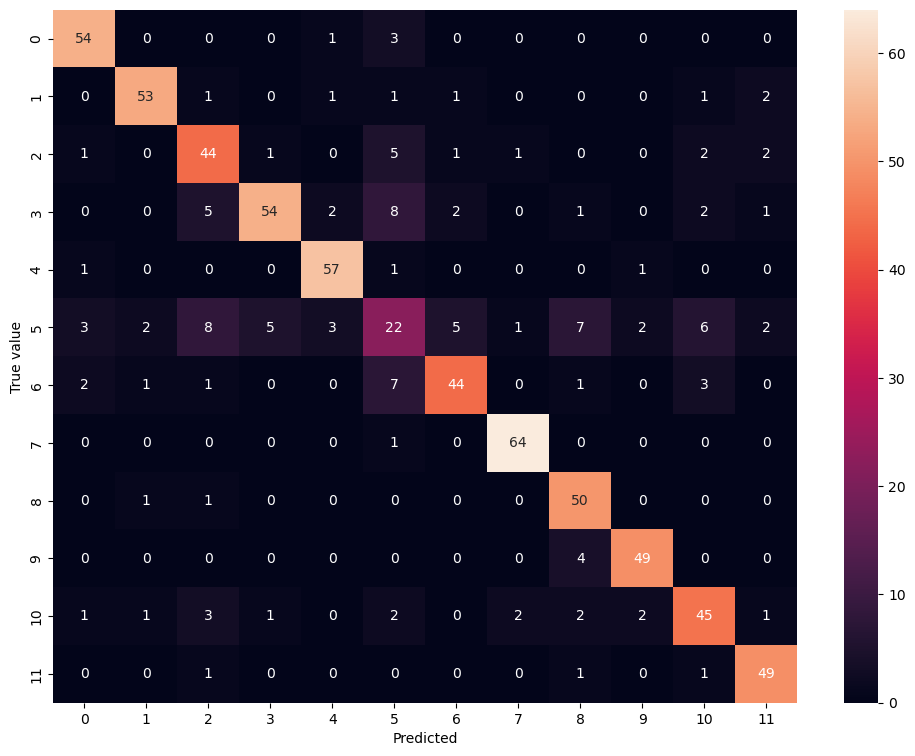

In [32]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,6) & (5,3) with 4 incorrect classifications represents how bipolar & depression & alcohol use disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [33]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        58
           2       0.91      0.88      0.90        60
           3       0.69      0.77      0.73        57
           4       0.89      0.72      0.79        75
           5       0.89      0.95      0.92        60
           6       0.44      0.33      0.38        66
           7       0.83      0.75      0.79        59
           8       0.94      0.98      0.96        65
           9       0.76      0.96      0.85        52
          10       0.91      0.92      0.92        53
          11       0.75      0.75      0.75        60
          12       0.86      0.94      0.90        52

    accuracy                           0.82       717
   macro avg       0.81      0.82      0.81       717
weighted avg       0.81      0.82      0.81       717



In [34]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


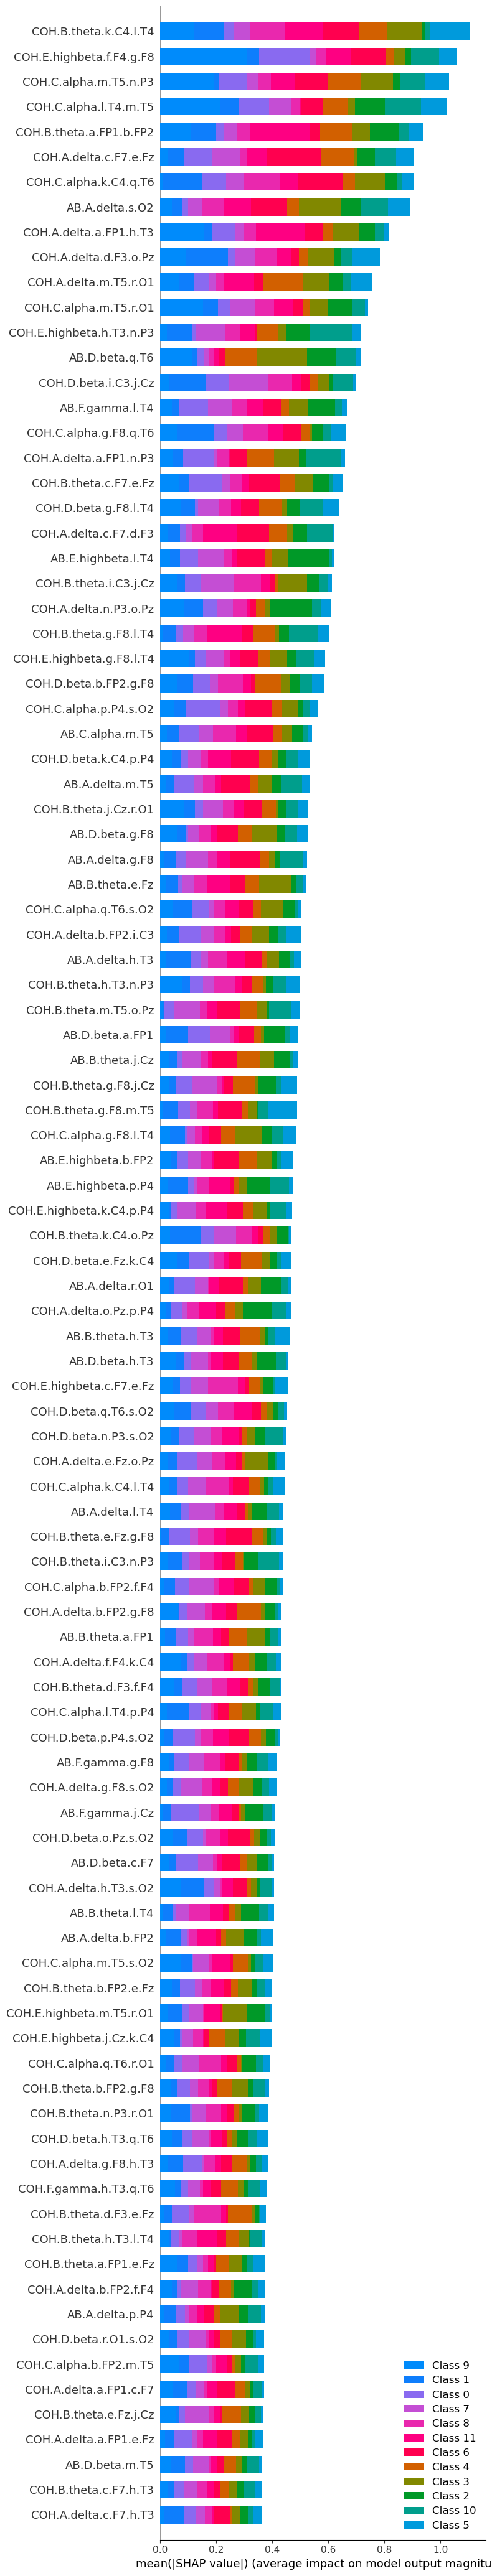

In [35]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [38]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
420,COH.B.theta.k.C4.l.T4,66.093154
878,COH.E.highbeta.f.F4.g.F8,63.145091
606,COH.C.alpha.m.T5.n.P3,61.504177
599,COH.C.alpha.l.T4.m.T5,61.034538
285,COH.B.theta.a.FP1.b.FP2,55.953412
...,...,...
1011,COH.F.gamma.c.F7.k.C4,0.000000
658,COH.D.beta.b.FP2.p.P4,0.000000
953,COH.E.highbeta.m.T5.s.O2,0.000000
897,COH.E.highbeta.g.F8.n.P3,0.000000


In [39]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.B.theta.k.C4.l.T4',
 'COH.E.highbeta.f.F4.g.F8',
 'COH.C.alpha.m.T5.n.P3',
 'COH.C.alpha.l.T4.m.T5',
 'COH.B.theta.a.FP1.b.FP2',
 'COH.A.delta.c.F7.e.Fz',
 'COH.C.alpha.k.C4.q.T6',
 'AB.A.delta.s.O2',
 'COH.A.delta.a.FP1.h.T3',
 'COH.A.delta.d.F3.o.Pz']

In [40]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,COH.B.theta.k.C4.l.T4,COH.E.highbeta.f.F4.g.F8,COH.C.alpha.m.T5.n.P3,COH.C.alpha.l.T4.m.T5,COH.B.theta.a.FP1.b.FP2,COH.A.delta.c.F7.e.Fz,COH.C.alpha.k.C4.q.T6,AB.A.delta.s.O2,COH.A.delta.a.FP1.h.T3,COH.A.delta.d.F3.o.Pz
0,49.913305,50.994064,30.890825,12.175660,84.738044,27.816832,14.582434,11.893948,22.598544,19.755486
1,61.908412,62.454171,74.153590,3.819884,87.083141,47.158736,13.880776,12.055957,41.007326,20.445955
2,51.598336,62.286293,76.746144,0.668130,77.140159,66.195530,49.027374,10.161765,37.764503,10.428363
3,64.211776,46.373828,95.131119,36.279940,62.238485,22.220491,53.775578,25.769522,34.926288,23.767460
4,39.764975,83.957526,60.991586,2.172658,83.356702,28.951934,45.842637,12.834485,21.655290,16.179525
...,...,...,...,...,...,...,...,...,...,...
940,64.677794,63.983253,99.954882,14.239692,68.800281,21.618074,50.986656,12.487389,18.285060,54.239836
941,74.297350,53.752238,76.767154,17.151953,89.057117,77.873309,40.249563,14.148625,51.843755,87.202605
942,49.313945,51.737530,73.775166,46.832841,99.680580,99.764306,31.163965,11.993932,40.445783,13.709847
943,72.423443,77.501159,84.876452,17.591222,99.614535,38.485546,31.392895,8.397872,63.032383,43.188471


In [41]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [42]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.11,
                           depth=2)

In [43]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4496241	total: 2.95ms	remaining: 14.7s
1:	learn: 2.4225850	total: 5ms	remaining: 12.5s
2:	learn: 2.4034780	total: 6.86ms	remaining: 11.4s
3:	learn: 2.3876288	total: 8.74ms	remaining: 10.9s
4:	learn: 2.3727974	total: 10.6ms	remaining: 10.6s
5:	learn: 2.3595978	total: 12.5ms	remaining: 10.4s
6:	learn: 2.3471328	total: 14.5ms	remaining: 10.3s
7:	learn: 2.3349608	total: 16.5ms	remaining: 10.3s
8:	learn: 2.3235472	total: 18.4ms	remaining: 10.2s
9:	learn: 2.3092628	total: 20.4ms	remaining: 10.2s
10:	learn: 2.2992658	total: 22.4ms	remaining: 10.2s
11:	learn: 2.2938375	total: 24.4ms	remaining: 10.2s
12:	learn: 2.2838606	total: 26.5ms	remaining: 10.1s
13:	learn: 2.2798065	total: 28.5ms	remaining: 10.1s
14:	learn: 2.2744114	total: 30.5ms	remaining: 10.1s
15:	learn: 2.2651496	total: 32.4ms	remaining: 10.1s
16:	learn: 2.2586649	total: 34.4ms	remaining: 10.1s
17:	learn: 2.2525752	total: 36.4ms	remaining: 10.1s
18:	learn: 2.2453572	total: 38.5ms	remaining: 10.1s
19:	learn: 2.2416135	tota

186:	learn: 1.8506800	total: 377ms	remaining: 9.72s
187:	learn: 1.8477928	total: 380ms	remaining: 9.71s
188:	learn: 1.8470828	total: 381ms	remaining: 9.71s
189:	learn: 1.8462068	total: 383ms	remaining: 9.71s
190:	learn: 1.8451662	total: 385ms	remaining: 9.7s
191:	learn: 1.8439063	total: 387ms	remaining: 9.7s
192:	learn: 1.8426223	total: 389ms	remaining: 9.69s
193:	learn: 1.8411391	total: 391ms	remaining: 9.69s
194:	learn: 1.8403163	total: 394ms	remaining: 9.7s
195:	learn: 1.8391755	total: 396ms	remaining: 9.7s
196:	learn: 1.8374166	total: 398ms	remaining: 9.69s
197:	learn: 1.8352350	total: 400ms	remaining: 9.69s
198:	learn: 1.8335547	total: 402ms	remaining: 9.69s
199:	learn: 1.8305788	total: 404ms	remaining: 9.69s
200:	learn: 1.8279179	total: 406ms	remaining: 9.69s
201:	learn: 1.8273069	total: 408ms	remaining: 9.68s
202:	learn: 1.8268126	total: 410ms	remaining: 9.68s
203:	learn: 1.8258599	total: 412ms	remaining: 9.68s
204:	learn: 1.8249170	total: 413ms	remaining: 9.67s
205:	learn: 1.82

383:	learn: 1.6105278	total: 762ms	remaining: 9.16s
384:	learn: 1.6102838	total: 764ms	remaining: 9.15s
385:	learn: 1.6096872	total: 766ms	remaining: 9.15s
386:	learn: 1.6090315	total: 768ms	remaining: 9.15s
387:	learn: 1.6084028	total: 770ms	remaining: 9.15s
388:	learn: 1.6074578	total: 772ms	remaining: 9.14s
389:	learn: 1.6068620	total: 774ms	remaining: 9.14s
390:	learn: 1.6062164	total: 775ms	remaining: 9.14s
391:	learn: 1.6061074	total: 777ms	remaining: 9.14s
392:	learn: 1.6054234	total: 780ms	remaining: 9.14s
393:	learn: 1.6032613	total: 782ms	remaining: 9.14s
394:	learn: 1.6028506	total: 784ms	remaining: 9.14s
395:	learn: 1.6022188	total: 786ms	remaining: 9.13s
396:	learn: 1.6017159	total: 788ms	remaining: 9.13s
397:	learn: 1.6012151	total: 790ms	remaining: 9.13s
398:	learn: 1.6004434	total: 792ms	remaining: 9.13s
399:	learn: 1.5998498	total: 794ms	remaining: 9.13s
400:	learn: 1.5990383	total: 796ms	remaining: 9.12s
401:	learn: 1.5966946	total: 798ms	remaining: 9.12s
402:	learn: 

578:	learn: 1.4308934	total: 1.15s	remaining: 8.76s
579:	learn: 1.4297690	total: 1.15s	remaining: 8.76s
580:	learn: 1.4291282	total: 1.15s	remaining: 8.76s
581:	learn: 1.4287186	total: 1.15s	remaining: 8.76s
582:	learn: 1.4273195	total: 1.16s	remaining: 8.77s
583:	learn: 1.4269231	total: 1.16s	remaining: 8.76s
584:	learn: 1.4260304	total: 1.16s	remaining: 8.76s
585:	learn: 1.4250269	total: 1.16s	remaining: 8.76s
586:	learn: 1.4239500	total: 1.17s	remaining: 8.76s
587:	learn: 1.4235814	total: 1.17s	remaining: 8.76s
588:	learn: 1.4229813	total: 1.17s	remaining: 8.76s
589:	learn: 1.4225664	total: 1.17s	remaining: 8.75s
590:	learn: 1.4220349	total: 1.17s	remaining: 8.75s
591:	learn: 1.4213497	total: 1.18s	remaining: 8.75s
592:	learn: 1.4204240	total: 1.18s	remaining: 8.75s
593:	learn: 1.4198767	total: 1.18s	remaining: 8.75s
594:	learn: 1.4177122	total: 1.18s	remaining: 8.75s
595:	learn: 1.4175202	total: 1.18s	remaining: 8.74s
596:	learn: 1.4172224	total: 1.19s	remaining: 8.74s
597:	learn: 

788:	learn: 1.2774394	total: 1.54s	remaining: 8.23s
789:	learn: 1.2770787	total: 1.54s	remaining: 8.24s
790:	learn: 1.2767037	total: 1.55s	remaining: 8.24s
791:	learn: 1.2762520	total: 1.55s	remaining: 8.24s
792:	learn: 1.2756455	total: 1.55s	remaining: 8.24s
793:	learn: 1.2748124	total: 1.55s	remaining: 8.24s
794:	learn: 1.2735527	total: 1.56s	remaining: 8.23s
795:	learn: 1.2721524	total: 1.56s	remaining: 8.23s
796:	learn: 1.2717619	total: 1.56s	remaining: 8.23s
797:	learn: 1.2709321	total: 1.56s	remaining: 8.23s
798:	learn: 1.2702766	total: 1.56s	remaining: 8.23s
799:	learn: 1.2694499	total: 1.57s	remaining: 8.23s
800:	learn: 1.2679607	total: 1.57s	remaining: 8.22s
801:	learn: 1.2672680	total: 1.57s	remaining: 8.22s
802:	learn: 1.2658953	total: 1.57s	remaining: 8.22s
803:	learn: 1.2657326	total: 1.57s	remaining: 8.22s
804:	learn: 1.2653215	total: 1.58s	remaining: 8.22s
805:	learn: 1.2641958	total: 1.58s	remaining: 8.22s
806:	learn: 1.2634882	total: 1.58s	remaining: 8.21s
807:	learn: 

987:	learn: 1.1450569	total: 1.93s	remaining: 7.83s
988:	learn: 1.1431051	total: 1.93s	remaining: 7.83s
989:	learn: 1.1428164	total: 1.93s	remaining: 7.83s
990:	learn: 1.1415935	total: 1.94s	remaining: 7.83s
991:	learn: 1.1405870	total: 1.94s	remaining: 7.83s
992:	learn: 1.1399504	total: 1.94s	remaining: 7.82s
993:	learn: 1.1389303	total: 1.94s	remaining: 7.82s
994:	learn: 1.1380773	total: 1.94s	remaining: 7.82s
995:	learn: 1.1378217	total: 1.94s	remaining: 7.82s
996:	learn: 1.1376081	total: 1.95s	remaining: 7.82s
997:	learn: 1.1373950	total: 1.95s	remaining: 7.81s
998:	learn: 1.1369433	total: 1.95s	remaining: 7.81s
999:	learn: 1.1364317	total: 1.95s	remaining: 7.81s
1000:	learn: 1.1348633	total: 1.95s	remaining: 7.81s
1001:	learn: 1.1345822	total: 1.96s	remaining: 7.8s
1002:	learn: 1.1339757	total: 1.96s	remaining: 7.8s
1003:	learn: 1.1337845	total: 1.96s	remaining: 7.8s
1004:	learn: 1.1329567	total: 1.96s	remaining: 7.8s
1005:	learn: 1.1315502	total: 1.96s	remaining: 7.8s
1006:	learn

1181:	learn: 1.0231946	total: 2.31s	remaining: 7.48s
1182:	learn: 1.0227594	total: 2.32s	remaining: 7.47s
1183:	learn: 1.0225446	total: 2.32s	remaining: 7.47s
1184:	learn: 1.0214738	total: 2.32s	remaining: 7.47s
1185:	learn: 1.0202210	total: 2.32s	remaining: 7.47s
1186:	learn: 1.0200689	total: 2.32s	remaining: 7.47s
1187:	learn: 1.0193017	total: 2.33s	remaining: 7.46s
1188:	learn: 1.0184982	total: 2.33s	remaining: 7.46s
1189:	learn: 1.0183285	total: 2.33s	remaining: 7.46s
1190:	learn: 1.0172387	total: 2.33s	remaining: 7.46s
1191:	learn: 1.0152341	total: 2.33s	remaining: 7.46s
1192:	learn: 1.0150658	total: 2.34s	remaining: 7.46s
1193:	learn: 1.0144288	total: 2.34s	remaining: 7.45s
1194:	learn: 1.0137744	total: 2.34s	remaining: 7.45s
1195:	learn: 1.0135137	total: 2.34s	remaining: 7.45s
1196:	learn: 1.0128191	total: 2.34s	remaining: 7.45s
1197:	learn: 1.0119152	total: 2.35s	remaining: 7.45s
1198:	learn: 1.0115772	total: 2.35s	remaining: 7.45s
1199:	learn: 1.0109109	total: 2.35s	remaining:

1380:	learn: 0.9191128	total: 2.71s	remaining: 7.1s
1381:	learn: 0.9183315	total: 2.71s	remaining: 7.1s
1382:	learn: 0.9181744	total: 2.71s	remaining: 7.09s
1383:	learn: 0.9179383	total: 2.71s	remaining: 7.09s
1384:	learn: 0.9173722	total: 2.72s	remaining: 7.09s
1385:	learn: 0.9170900	total: 2.72s	remaining: 7.09s
1386:	learn: 0.9167749	total: 2.72s	remaining: 7.09s
1387:	learn: 0.9157672	total: 2.72s	remaining: 7.08s
1388:	learn: 0.9155260	total: 2.72s	remaining: 7.08s
1389:	learn: 0.9145094	total: 2.73s	remaining: 7.08s
1390:	learn: 0.9135665	total: 2.73s	remaining: 7.08s
1391:	learn: 0.9132369	total: 2.73s	remaining: 7.08s
1392:	learn: 0.9130476	total: 2.73s	remaining: 7.08s
1393:	learn: 0.9119400	total: 2.73s	remaining: 7.07s
1394:	learn: 0.9115342	total: 2.74s	remaining: 7.07s
1395:	learn: 0.9111702	total: 2.74s	remaining: 7.07s
1396:	learn: 0.9106466	total: 2.74s	remaining: 7.07s
1397:	learn: 0.9103301	total: 2.74s	remaining: 7.07s
1398:	learn: 0.9098713	total: 2.74s	remaining: 7

1581:	learn: 0.8236224	total: 3.1s	remaining: 6.69s
1582:	learn: 0.8235159	total: 3.1s	remaining: 6.68s
1583:	learn: 0.8233377	total: 3.1s	remaining: 6.68s
1584:	learn: 0.8226242	total: 3.1s	remaining: 6.68s
1585:	learn: 0.8224764	total: 3.1s	remaining: 6.68s
1586:	learn: 0.8221173	total: 3.1s	remaining: 6.68s
1587:	learn: 0.8213314	total: 3.11s	remaining: 6.67s
1588:	learn: 0.8208203	total: 3.11s	remaining: 6.67s
1589:	learn: 0.8207150	total: 3.11s	remaining: 6.67s
1590:	learn: 0.8199540	total: 3.11s	remaining: 6.67s
1591:	learn: 0.8196942	total: 3.11s	remaining: 6.67s
1592:	learn: 0.8194292	total: 3.12s	remaining: 6.67s
1593:	learn: 0.8191562	total: 3.12s	remaining: 6.66s
1594:	learn: 0.8183859	total: 3.12s	remaining: 6.66s
1595:	learn: 0.8173963	total: 3.12s	remaining: 6.66s
1596:	learn: 0.8165015	total: 3.12s	remaining: 6.66s
1597:	learn: 0.8163968	total: 3.13s	remaining: 6.66s
1598:	learn: 0.8161798	total: 3.13s	remaining: 6.65s
1599:	learn: 0.8158701	total: 3.13s	remaining: 6.65s

1782:	learn: 0.7446033	total: 3.48s	remaining: 6.28s
1783:	learn: 0.7437921	total: 3.48s	remaining: 6.28s
1784:	learn: 0.7427946	total: 3.48s	remaining: 6.28s
1785:	learn: 0.7422878	total: 3.49s	remaining: 6.28s
1786:	learn: 0.7419133	total: 3.49s	remaining: 6.27s
1787:	learn: 0.7416439	total: 3.49s	remaining: 6.27s
1788:	learn: 0.7409499	total: 3.49s	remaining: 6.27s
1789:	learn: 0.7408490	total: 3.5s	remaining: 6.27s
1790:	learn: 0.7405352	total: 3.5s	remaining: 6.27s
1791:	learn: 0.7403911	total: 3.5s	remaining: 6.26s
1792:	learn: 0.7396802	total: 3.5s	remaining: 6.26s
1793:	learn: 0.7390088	total: 3.5s	remaining: 6.26s
1794:	learn: 0.7387814	total: 3.5s	remaining: 6.26s
1795:	learn: 0.7386309	total: 3.51s	remaining: 6.26s
1796:	learn: 0.7383930	total: 3.51s	remaining: 6.25s
1797:	learn: 0.7379183	total: 3.51s	remaining: 6.25s
1798:	learn: 0.7373640	total: 3.51s	remaining: 6.25s
1799:	learn: 0.7372388	total: 3.51s	remaining: 6.25s
1800:	learn: 0.7368378	total: 3.52s	remaining: 6.25s

1978:	learn: 0.6729758	total: 3.87s	remaining: 5.9s
1979:	learn: 0.6726189	total: 3.87s	remaining: 5.9s
1980:	learn: 0.6724983	total: 3.87s	remaining: 5.9s
1981:	learn: 0.6722515	total: 3.87s	remaining: 5.9s
1982:	learn: 0.6719856	total: 3.88s	remaining: 5.9s
1983:	learn: 0.6715239	total: 3.88s	remaining: 5.89s
1984:	learn: 0.6713658	total: 3.88s	remaining: 5.89s
1985:	learn: 0.6711375	total: 3.88s	remaining: 5.89s
1986:	learn: 0.6709438	total: 3.88s	remaining: 5.89s
1987:	learn: 0.6704205	total: 3.89s	remaining: 5.89s
1988:	learn: 0.6700176	total: 3.89s	remaining: 5.89s
1989:	learn: 0.6698991	total: 3.89s	remaining: 5.88s
1990:	learn: 0.6696282	total: 3.89s	remaining: 5.88s
1991:	learn: 0.6692867	total: 3.89s	remaining: 5.88s
1992:	learn: 0.6691670	total: 3.9s	remaining: 5.88s
1993:	learn: 0.6684458	total: 3.9s	remaining: 5.88s
1994:	learn: 0.6679086	total: 3.9s	remaining: 5.88s
1995:	learn: 0.6672850	total: 3.9s	remaining: 5.87s
1996:	learn: 0.6671346	total: 3.9s	remaining: 5.87s
199

2168:	learn: 0.6084858	total: 4.25s	remaining: 5.55s
2169:	learn: 0.6083263	total: 4.25s	remaining: 5.55s
2170:	learn: 0.6079270	total: 4.26s	remaining: 5.55s
2171:	learn: 0.6072182	total: 4.26s	remaining: 5.54s
2172:	learn: 0.6070295	total: 4.26s	remaining: 5.54s
2173:	learn: 0.6067324	total: 4.26s	remaining: 5.54s
2174:	learn: 0.6066433	total: 4.26s	remaining: 5.54s
2175:	learn: 0.6065847	total: 4.27s	remaining: 5.54s
2176:	learn: 0.6061043	total: 4.27s	remaining: 5.54s
2177:	learn: 0.6058892	total: 4.27s	remaining: 5.53s
2178:	learn: 0.6056779	total: 4.27s	remaining: 5.53s
2179:	learn: 0.6054257	total: 4.28s	remaining: 5.53s
2180:	learn: 0.6053877	total: 4.28s	remaining: 5.53s
2181:	learn: 0.6051558	total: 4.28s	remaining: 5.53s
2182:	learn: 0.6049240	total: 4.28s	remaining: 5.52s
2183:	learn: 0.6045689	total: 4.28s	remaining: 5.52s
2184:	learn: 0.6044470	total: 4.29s	remaining: 5.52s
2185:	learn: 0.6039864	total: 4.29s	remaining: 5.52s
2186:	learn: 0.6038145	total: 4.29s	remaining:

2359:	learn: 0.5561426	total: 4.64s	remaining: 5.19s
2360:	learn: 0.5553289	total: 4.64s	remaining: 5.18s
2361:	learn: 0.5545780	total: 4.64s	remaining: 5.18s
2362:	learn: 0.5543488	total: 4.64s	remaining: 5.18s
2363:	learn: 0.5541826	total: 4.64s	remaining: 5.18s
2364:	learn: 0.5537078	total: 4.65s	remaining: 5.18s
2365:	learn: 0.5533020	total: 4.65s	remaining: 5.17s
2366:	learn: 0.5531614	total: 4.65s	remaining: 5.17s
2367:	learn: 0.5528893	total: 4.65s	remaining: 5.17s
2368:	learn: 0.5527060	total: 4.65s	remaining: 5.17s
2369:	learn: 0.5526257	total: 4.66s	remaining: 5.17s
2370:	learn: 0.5523381	total: 4.66s	remaining: 5.17s
2371:	learn: 0.5517416	total: 4.66s	remaining: 5.16s
2372:	learn: 0.5513838	total: 4.66s	remaining: 5.16s
2373:	learn: 0.5510223	total: 4.66s	remaining: 5.16s
2374:	learn: 0.5504373	total: 4.67s	remaining: 5.16s
2375:	learn: 0.5502924	total: 4.67s	remaining: 5.16s
2376:	learn: 0.5499309	total: 4.67s	remaining: 5.15s
2377:	learn: 0.5498545	total: 4.67s	remaining:

2553:	learn: 0.5061050	total: 5.02s	remaining: 4.81s
2554:	learn: 0.5058145	total: 5.03s	remaining: 4.81s
2555:	learn: 0.5056281	total: 5.03s	remaining: 4.81s
2556:	learn: 0.5054486	total: 5.03s	remaining: 4.8s
2557:	learn: 0.5052464	total: 5.03s	remaining: 4.8s
2558:	learn: 0.5050987	total: 5.03s	remaining: 4.8s
2559:	learn: 0.5049300	total: 5.04s	remaining: 4.8s
2560:	learn: 0.5046839	total: 5.04s	remaining: 4.8s
2561:	learn: 0.5044979	total: 5.04s	remaining: 4.8s
2562:	learn: 0.5044477	total: 5.04s	remaining: 4.79s
2563:	learn: 0.5043291	total: 5.04s	remaining: 4.79s
2564:	learn: 0.5042608	total: 5.04s	remaining: 4.79s
2565:	learn: 0.5041910	total: 5.05s	remaining: 4.79s
2566:	learn: 0.5038577	total: 5.05s	remaining: 4.79s
2567:	learn: 0.5037093	total: 5.05s	remaining: 4.78s
2568:	learn: 0.5032306	total: 5.05s	remaining: 4.78s
2569:	learn: 0.5031097	total: 5.06s	remaining: 4.78s
2570:	learn: 0.5028736	total: 5.06s	remaining: 4.78s
2571:	learn: 0.5025925	total: 5.06s	remaining: 4.78s

2734:	learn: 0.4664146	total: 5.39s	remaining: 4.46s
2735:	learn: 0.4659617	total: 5.39s	remaining: 4.46s
2736:	learn: 0.4659103	total: 5.39s	remaining: 4.46s
2737:	learn: 0.4658923	total: 5.4s	remaining: 4.46s
2738:	learn: 0.4657842	total: 5.4s	remaining: 4.46s
2739:	learn: 0.4655334	total: 5.4s	remaining: 4.46s
2740:	learn: 0.4654178	total: 5.4s	remaining: 4.45s
2741:	learn: 0.4653415	total: 5.41s	remaining: 4.45s
2742:	learn: 0.4651781	total: 5.41s	remaining: 4.45s
2743:	learn: 0.4651094	total: 5.41s	remaining: 4.45s
2744:	learn: 0.4648641	total: 5.41s	remaining: 4.45s
2745:	learn: 0.4643927	total: 5.41s	remaining: 4.44s
2746:	learn: 0.4639914	total: 5.42s	remaining: 4.44s
2747:	learn: 0.4637942	total: 5.42s	remaining: 4.44s
2748:	learn: 0.4636365	total: 5.42s	remaining: 4.44s
2749:	learn: 0.4635489	total: 5.42s	remaining: 4.44s
2750:	learn: 0.4631696	total: 5.42s	remaining: 4.43s
2751:	learn: 0.4631548	total: 5.43s	remaining: 4.43s
2752:	learn: 0.4630734	total: 5.43s	remaining: 4.4

2919:	learn: 0.4269749	total: 5.77s	remaining: 4.11s
2920:	learn: 0.4268846	total: 5.78s	remaining: 4.11s
2921:	learn: 0.4267707	total: 5.78s	remaining: 4.11s
2922:	learn: 0.4266537	total: 5.78s	remaining: 4.11s
2923:	learn: 0.4264257	total: 5.78s	remaining: 4.11s
2924:	learn: 0.4263058	total: 5.79s	remaining: 4.1s
2925:	learn: 0.4259105	total: 5.79s	remaining: 4.1s
2926:	learn: 0.4257382	total: 5.79s	remaining: 4.1s
2927:	learn: 0.4256120	total: 5.79s	remaining: 4.1s
2928:	learn: 0.4253566	total: 5.79s	remaining: 4.1s
2929:	learn: 0.4251266	total: 5.8s	remaining: 4.09s
2930:	learn: 0.4250722	total: 5.8s	remaining: 4.09s
2931:	learn: 0.4249203	total: 5.8s	remaining: 4.09s
2932:	learn: 0.4243958	total: 5.8s	remaining: 4.09s
2933:	learn: 0.4241707	total: 5.81s	remaining: 4.09s
2934:	learn: 0.4241254	total: 5.81s	remaining: 4.09s
2935:	learn: 0.4239925	total: 5.81s	remaining: 4.08s
2936:	learn: 0.4238277	total: 5.81s	remaining: 4.08s
2937:	learn: 0.4237413	total: 5.81s	remaining: 4.08s
29

3103:	learn: 0.3952295	total: 6.16s	remaining: 3.76s
3104:	learn: 0.3950365	total: 6.16s	remaining: 3.76s
3105:	learn: 0.3949573	total: 6.16s	remaining: 3.76s
3106:	learn: 0.3947315	total: 6.17s	remaining: 3.76s
3107:	learn: 0.3945891	total: 6.17s	remaining: 3.75s
3108:	learn: 0.3943310	total: 6.17s	remaining: 3.75s
3109:	learn: 0.3942023	total: 6.17s	remaining: 3.75s
3110:	learn: 0.3940850	total: 6.17s	remaining: 3.75s
3111:	learn: 0.3940389	total: 6.18s	remaining: 3.75s
3112:	learn: 0.3936940	total: 6.18s	remaining: 3.75s
3113:	learn: 0.3934935	total: 6.18s	remaining: 3.74s
3114:	learn: 0.3934262	total: 6.18s	remaining: 3.74s
3115:	learn: 0.3932055	total: 6.18s	remaining: 3.74s
3116:	learn: 0.3930182	total: 6.19s	remaining: 3.74s
3117:	learn: 0.3928662	total: 6.19s	remaining: 3.73s
3118:	learn: 0.3928290	total: 6.19s	remaining: 3.73s
3119:	learn: 0.3925375	total: 6.19s	remaining: 3.73s
3120:	learn: 0.3923095	total: 6.19s	remaining: 3.73s
3121:	learn: 0.3922049	total: 6.2s	remaining: 

3288:	learn: 0.3678333	total: 6.54s	remaining: 3.4s
3289:	learn: 0.3676418	total: 6.54s	remaining: 3.4s
3290:	learn: 0.3673669	total: 6.55s	remaining: 3.4s
3291:	learn: 0.3672964	total: 6.55s	remaining: 3.4s
3292:	learn: 0.3668970	total: 6.55s	remaining: 3.4s
3293:	learn: 0.3667021	total: 6.55s	remaining: 3.39s
3294:	learn: 0.3663414	total: 6.55s	remaining: 3.39s
3295:	learn: 0.3662614	total: 6.56s	remaining: 3.39s
3296:	learn: 0.3661915	total: 6.56s	remaining: 3.39s
3297:	learn: 0.3660645	total: 6.56s	remaining: 3.38s
3298:	learn: 0.3660013	total: 6.56s	remaining: 3.38s
3299:	learn: 0.3659397	total: 6.56s	remaining: 3.38s
3300:	learn: 0.3657590	total: 6.57s	remaining: 3.38s
3301:	learn: 0.3657255	total: 6.57s	remaining: 3.38s
3302:	learn: 0.3656174	total: 6.57s	remaining: 3.38s
3303:	learn: 0.3655485	total: 6.57s	remaining: 3.37s
3304:	learn: 0.3655278	total: 6.57s	remaining: 3.37s
3305:	learn: 0.3653146	total: 6.58s	remaining: 3.37s
3306:	learn: 0.3652660	total: 6.58s	remaining: 3.37

3480:	learn: 0.3400394	total: 6.94s	remaining: 3.03s
3481:	learn: 0.3398177	total: 6.94s	remaining: 3.02s
3482:	learn: 0.3396827	total: 6.94s	remaining: 3.02s
3483:	learn: 0.3396286	total: 6.94s	remaining: 3.02s
3484:	learn: 0.3393518	total: 6.95s	remaining: 3.02s
3485:	learn: 0.3391017	total: 6.95s	remaining: 3.02s
3486:	learn: 0.3390482	total: 6.95s	remaining: 3.02s
3487:	learn: 0.3389601	total: 6.95s	remaining: 3.01s
3488:	learn: 0.3388959	total: 6.95s	remaining: 3.01s
3489:	learn: 0.3387043	total: 6.96s	remaining: 3.01s
3490:	learn: 0.3386224	total: 6.96s	remaining: 3.01s
3491:	learn: 0.3384169	total: 6.96s	remaining: 3s
3492:	learn: 0.3383629	total: 6.96s	remaining: 3s
3493:	learn: 0.3382862	total: 6.96s	remaining: 3s
3494:	learn: 0.3382266	total: 6.96s	remaining: 3s
3495:	learn: 0.3379771	total: 6.97s	remaining: 3s
3496:	learn: 0.3377594	total: 6.97s	remaining: 3s
3497:	learn: 0.3376093	total: 6.97s	remaining: 2.99s
3498:	learn: 0.3373273	total: 6.97s	remaining: 2.99s
3499:	learn

3672:	learn: 0.3132298	total: 7.32s	remaining: 2.64s
3673:	learn: 0.3131028	total: 7.32s	remaining: 2.64s
3674:	learn: 0.3130287	total: 7.32s	remaining: 2.64s
3675:	learn: 0.3127612	total: 7.33s	remaining: 2.64s
3676:	learn: 0.3127161	total: 7.33s	remaining: 2.64s
3677:	learn: 0.3126331	total: 7.33s	remaining: 2.63s
3678:	learn: 0.3125049	total: 7.33s	remaining: 2.63s
3679:	learn: 0.3124345	total: 7.33s	remaining: 2.63s
3680:	learn: 0.3123724	total: 7.33s	remaining: 2.63s
3681:	learn: 0.3123042	total: 7.34s	remaining: 2.63s
3682:	learn: 0.3120342	total: 7.34s	remaining: 2.62s
3683:	learn: 0.3117974	total: 7.34s	remaining: 2.62s
3684:	learn: 0.3115784	total: 7.34s	remaining: 2.62s
3685:	learn: 0.3114650	total: 7.34s	remaining: 2.62s
3686:	learn: 0.3112536	total: 7.35s	remaining: 2.62s
3687:	learn: 0.3111888	total: 7.35s	remaining: 2.61s
3688:	learn: 0.3109394	total: 7.35s	remaining: 2.61s
3689:	learn: 0.3106984	total: 7.35s	remaining: 2.61s
3690:	learn: 0.3105813	total: 7.36s	remaining:

3869:	learn: 0.2890772	total: 7.71s	remaining: 2.25s
3870:	learn: 0.2890347	total: 7.71s	remaining: 2.25s
3871:	learn: 0.2888330	total: 7.71s	remaining: 2.25s
3872:	learn: 0.2886687	total: 7.71s	remaining: 2.24s
3873:	learn: 0.2884463	total: 7.71s	remaining: 2.24s
3874:	learn: 0.2884148	total: 7.71s	remaining: 2.24s
3875:	learn: 0.2881349	total: 7.72s	remaining: 2.24s
3876:	learn: 0.2880237	total: 7.72s	remaining: 2.23s
3877:	learn: 0.2877530	total: 7.72s	remaining: 2.23s
3878:	learn: 0.2876463	total: 7.72s	remaining: 2.23s
3879:	learn: 0.2875833	total: 7.72s	remaining: 2.23s
3880:	learn: 0.2875099	total: 7.73s	remaining: 2.23s
3881:	learn: 0.2874414	total: 7.73s	remaining: 2.23s
3882:	learn: 0.2872492	total: 7.73s	remaining: 2.22s
3883:	learn: 0.2872116	total: 7.73s	remaining: 2.22s
3884:	learn: 0.2870210	total: 7.73s	remaining: 2.22s
3885:	learn: 0.2869751	total: 7.74s	remaining: 2.22s
3886:	learn: 0.2867457	total: 7.74s	remaining: 2.21s
3887:	learn: 0.2866813	total: 7.74s	remaining:

4052:	learn: 0.2679057	total: 8.07s	remaining: 1.89s
4053:	learn: 0.2678344	total: 8.08s	remaining: 1.89s
4054:	learn: 0.2677802	total: 8.08s	remaining: 1.88s
4055:	learn: 0.2677437	total: 8.08s	remaining: 1.88s
4056:	learn: 0.2677119	total: 8.08s	remaining: 1.88s
4057:	learn: 0.2676501	total: 8.09s	remaining: 1.88s
4058:	learn: 0.2676067	total: 8.09s	remaining: 1.88s
4059:	learn: 0.2675159	total: 8.09s	remaining: 1.87s
4060:	learn: 0.2674666	total: 8.09s	remaining: 1.87s
4061:	learn: 0.2673566	total: 8.09s	remaining: 1.87s
4062:	learn: 0.2673346	total: 8.1s	remaining: 1.87s
4063:	learn: 0.2671598	total: 8.1s	remaining: 1.86s
4064:	learn: 0.2668927	total: 8.1s	remaining: 1.86s
4065:	learn: 0.2668515	total: 8.1s	remaining: 1.86s
4066:	learn: 0.2667115	total: 8.1s	remaining: 1.86s
4067:	learn: 0.2664659	total: 8.11s	remaining: 1.86s
4068:	learn: 0.2664225	total: 8.11s	remaining: 1.85s
4069:	learn: 0.2663916	total: 8.11s	remaining: 1.85s
4070:	learn: 0.2663303	total: 8.11s	remaining: 1.85

4236:	learn: 0.2517954	total: 8.46s	remaining: 1.52s
4237:	learn: 0.2517483	total: 8.46s	remaining: 1.52s
4238:	learn: 0.2517114	total: 8.46s	remaining: 1.52s
4239:	learn: 0.2516687	total: 8.47s	remaining: 1.52s
4240:	learn: 0.2515750	total: 8.47s	remaining: 1.51s
4241:	learn: 0.2514939	total: 8.47s	remaining: 1.51s
4242:	learn: 0.2514664	total: 8.47s	remaining: 1.51s
4243:	learn: 0.2514329	total: 8.47s	remaining: 1.51s
4244:	learn: 0.2513447	total: 8.48s	remaining: 1.51s
4245:	learn: 0.2510476	total: 8.48s	remaining: 1.5s
4246:	learn: 0.2509933	total: 8.48s	remaining: 1.5s
4247:	learn: 0.2509601	total: 8.48s	remaining: 1.5s
4248:	learn: 0.2509277	total: 8.49s	remaining: 1.5s
4249:	learn: 0.2508935	total: 8.49s	remaining: 1.5s
4250:	learn: 0.2508625	total: 8.49s	remaining: 1.5s
4251:	learn: 0.2507102	total: 8.49s	remaining: 1.49s
4252:	learn: 0.2506685	total: 8.49s	remaining: 1.49s
4253:	learn: 0.2506428	total: 8.5s	remaining: 1.49s
4254:	learn: 0.2505806	total: 8.5s	remaining: 1.49s
4

4424:	learn: 0.2368889	total: 8.85s	remaining: 1.15s
4425:	learn: 0.2367646	total: 8.85s	remaining: 1.15s
4426:	learn: 0.2366607	total: 8.85s	remaining: 1.15s
4427:	learn: 0.2365879	total: 8.85s	remaining: 1.14s
4428:	learn: 0.2364664	total: 8.85s	remaining: 1.14s
4429:	learn: 0.2364410	total: 8.86s	remaining: 1.14s
4430:	learn: 0.2363991	total: 8.86s	remaining: 1.14s
4431:	learn: 0.2362073	total: 8.86s	remaining: 1.14s
4432:	learn: 0.2360030	total: 8.86s	remaining: 1.13s
4433:	learn: 0.2357791	total: 8.87s	remaining: 1.13s
4434:	learn: 0.2357512	total: 8.87s	remaining: 1.13s
4435:	learn: 0.2354707	total: 8.87s	remaining: 1.13s
4436:	learn: 0.2354359	total: 8.87s	remaining: 1.13s
4437:	learn: 0.2354178	total: 8.87s	remaining: 1.12s
4438:	learn: 0.2353738	total: 8.87s	remaining: 1.12s
4439:	learn: 0.2352063	total: 8.88s	remaining: 1.12s
4440:	learn: 0.2351748	total: 8.88s	remaining: 1.12s
4441:	learn: 0.2350357	total: 8.88s	remaining: 1.11s
4442:	learn: 0.2349660	total: 8.88s	remaining:

4606:	learn: 0.2221904	total: 9.23s	remaining: 787ms
4607:	learn: 0.2220685	total: 9.23s	remaining: 785ms
4608:	learn: 0.2219495	total: 9.23s	remaining: 783ms
4609:	learn: 0.2218914	total: 9.23s	remaining: 781ms
4610:	learn: 0.2217270	total: 9.23s	remaining: 779ms
4611:	learn: 0.2216894	total: 9.24s	remaining: 777ms
4612:	learn: 0.2216141	total: 9.24s	remaining: 775ms
4613:	learn: 0.2215766	total: 9.24s	remaining: 773ms
4614:	learn: 0.2214507	total: 9.24s	remaining: 771ms
4615:	learn: 0.2214037	total: 9.24s	remaining: 769ms
4616:	learn: 0.2213559	total: 9.25s	remaining: 767ms
4617:	learn: 0.2212040	total: 9.25s	remaining: 765ms
4618:	learn: 0.2211603	total: 9.25s	remaining: 763ms
4619:	learn: 0.2211152	total: 9.25s	remaining: 761ms
4620:	learn: 0.2211007	total: 9.25s	remaining: 759ms
4621:	learn: 0.2210815	total: 9.26s	remaining: 757ms
4622:	learn: 0.2210480	total: 9.26s	remaining: 755ms
4623:	learn: 0.2209462	total: 9.26s	remaining: 753ms
4624:	learn: 0.2209079	total: 9.26s	remaining:

4799:	learn: 0.2094264	total: 9.61s	remaining: 400ms
4800:	learn: 0.2093930	total: 9.61s	remaining: 399ms
4801:	learn: 0.2093740	total: 9.62s	remaining: 397ms
4802:	learn: 0.2093344	total: 9.62s	remaining: 395ms
4803:	learn: 0.2093154	total: 9.62s	remaining: 393ms
4804:	learn: 0.2092590	total: 9.62s	remaining: 391ms
4805:	learn: 0.2092398	total: 9.62s	remaining: 389ms
4806:	learn: 0.2091959	total: 9.63s	remaining: 387ms
4807:	learn: 0.2091685	total: 9.63s	remaining: 385ms
4808:	learn: 0.2091396	total: 9.63s	remaining: 382ms
4809:	learn: 0.2091263	total: 9.63s	remaining: 380ms
4810:	learn: 0.2091005	total: 9.63s	remaining: 378ms
4811:	learn: 0.2089545	total: 9.64s	remaining: 376ms
4812:	learn: 0.2087751	total: 9.64s	remaining: 374ms
4813:	learn: 0.2086868	total: 9.64s	remaining: 372ms
4814:	learn: 0.2086533	total: 9.64s	remaining: 370ms
4815:	learn: 0.2085721	total: 9.64s	remaining: 368ms
4816:	learn: 0.2084885	total: 9.65s	remaining: 366ms
4817:	learn: 0.2083885	total: 9.65s	remaining:

4978:	learn: 0.1976434	total: 9.99s	remaining: 42.2ms
4979:	learn: 0.1976132	total: 10s	remaining: 40.1ms
4980:	learn: 0.1974622	total: 10s	remaining: 38.1ms
4981:	learn: 0.1974067	total: 10s	remaining: 36.1ms
4982:	learn: 0.1974032	total: 10s	remaining: 34.1ms
4983:	learn: 0.1973815	total: 10s	remaining: 32.1ms
4984:	learn: 0.1972809	total: 10s	remaining: 30.1ms
4985:	learn: 0.1972055	total: 10s	remaining: 28.1ms
4986:	learn: 0.1971673	total: 10s	remaining: 26.1ms
4987:	learn: 0.1971328	total: 10s	remaining: 24.1ms
4988:	learn: 0.1970445	total: 10s	remaining: 22.1ms
4989:	learn: 0.1970281	total: 10s	remaining: 20.1ms
4990:	learn: 0.1969669	total: 10s	remaining: 18.1ms
4991:	learn: 0.1968285	total: 10s	remaining: 16.1ms
4992:	learn: 0.1967794	total: 10s	remaining: 14.1ms
4993:	learn: 0.1966490	total: 10s	remaining: 12ms
4994:	learn: 0.1965183	total: 10s	remaining: 10ms
4995:	learn: 0.1964950	total: 10s	remaining: 8.03ms
4996:	learn: 0.1963928	total: 10s	remaining: 6.02ms
4997:	learn: 0

In [44]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.15492957746478872

In [45]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[12],
       [ 6],
       [ 1],
       [11],
       [11],
       [ 5],
       [ 9],
       [ 3],
       [11],
       [ 8],
       [11],
       [11],
       [ 3],
       [11],
       [ 7],
       [ 4],
       [ 8],
       [ 6],
       [ 4],
       [11],
       [11],
       [ 6],
       [ 6],
       [ 1],
       [11],
       [ 5],
       [ 3],
       [ 3],
       [12],
       [10],
       [10],
       [ 6],
       [ 6],
       [ 8],
       [ 6],
       [ 7],
       [ 4],
       [ 6],
       [ 6],
       [12],
       [10],
       [ 9],
       [ 6],
       [ 7],
       [ 6],
       [ 7],
       [ 6],
       [ 6],
       [ 4],
       [10],
       [ 6],
       [ 7],
       [ 6],
       [ 3],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 1],
       [ 3],
       [ 4],
       [10],
       [ 6],
       [ 3],
       [ 6],
       [ 3],
       [ 6],
       [ 4],
       [ 5],
       [ 1],
       [ 6],
       [ 7],
       [ 3],
       [ 4],
       [ 4],
       [ 6],
       [11],

In [46]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  2,  0,  1,  5,  1,  0,  0,  0,  1,  0],
       [ 1,  0,  1,  0,  0,  3,  2,  1,  0,  1,  3,  1],
       [ 0,  0,  0,  0,  2, 11,  1,  1,  1,  4,  5,  0],
       [ 1,  0,  4,  9,  1,  2,  2,  0,  2,  2,  3,  0],
       [ 5,  0,  2,  4,  2,  4,  1,  1,  2,  0,  3,  4],
       [ 0,  1, 13,  3,  4, 16,  5,  4,  4,  1,  8,  2],
       [ 2,  0,  3,  1,  1,  9,  6,  1,  1,  2,  5,  0],
       [ 0,  0,  0,  1,  0,  6,  1,  1,  0,  1,  2,  0],
       [ 0,  2,  1,  0,  1,  6,  3,  1,  0,  2,  3,  0],
       [ 0,  0,  1,  1,  1,  2,  0,  1,  0,  3,  2,  0],
       [ 0,  0,  4,  4,  0,  9,  5,  0,  1,  3,  5,  3],
       [ 0,  0,  0,  3,  1,  5,  0,  0,  0,  1,  2,  2]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

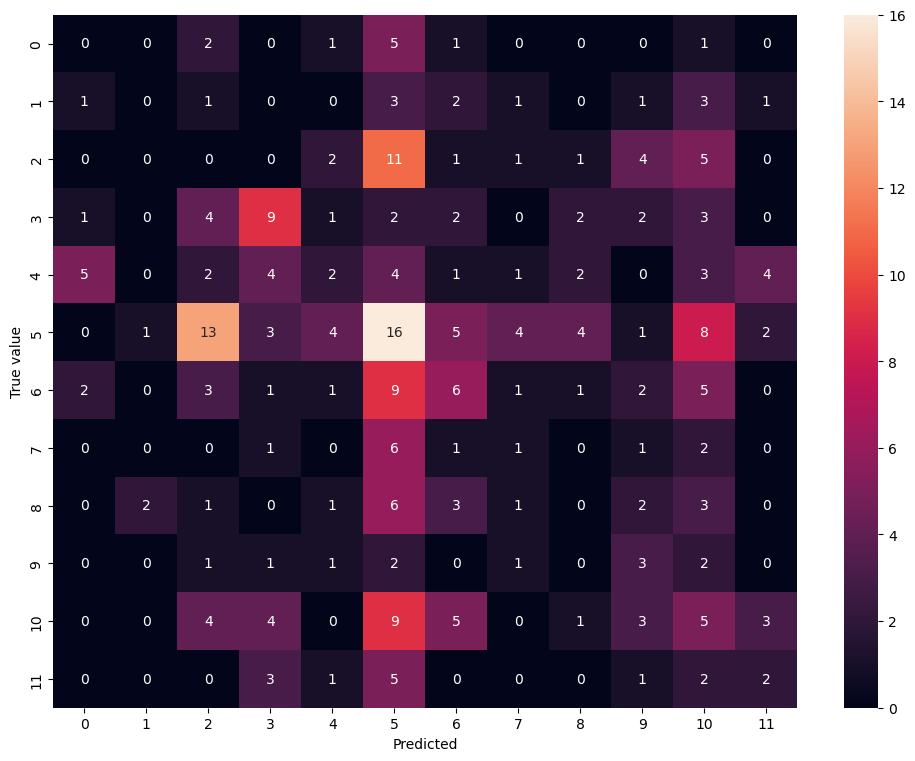

In [47]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5, 2) & (2,5) with 13/11 incorrect classifications represents how adjustment & depression disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [48]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        25
           4       0.35      0.35      0.35        26
           5       0.14      0.07      0.10        28
           6       0.21      0.26      0.23        61
           7       0.22      0.19      0.21        31
           8       0.09      0.08      0.09        12
           9       0.00      0.00      0.00        19
          10       0.15      0.27      0.19        11
          11       0.12      0.15      0.13        34
          12       0.17      0.14      0.15        14

    accuracy                           0.15       284
   macro avg       0.12      0.13      0.12       284
weighted avg       0.15      0.15      0.15       284



In [49]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html